#  Lending Club Case Study

### Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. 
### Borrowers can easily access lower interest rate loans through a fast online interface.
### 1The objective is to identify predictor of default so that at the time of loan application, company can use those variable for approval or rejection of loan


In [717]:
# Importing required python libraries for preprocessing and EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [718]:
# Importing dataset 
data=pd.read_csv('loan.csv')
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [719]:
# Printing Information About Datset
print(data.shape)
data.info()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [720]:
# Printing column names in Datset
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [721]:
# general Overview of data
data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [722]:
# checking for null values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [723]:
# checking data type of columns in datasets
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [724]:
# checking duplicate records present in dataset
data.duplicated().sum()


0

In [725]:
# removing columns with null values
df1=data.isnull().all(axis=0)

In [726]:
df1=df.columns[df.isnull().all(axis=0)].tolist()

In [727]:
data=data.drop(df1, axis=1)

In [728]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [729]:
# droping the columns with  some null values which not add any value in dataset
data=data.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pymnt_plan'], axis=1)

In [730]:

data=data.drop(['collections_12_mths_ex_med','delinq_amnt','policy_code','acc_now_delinq'], axis=1)

In [731]:
# Droping record which has null values 
data = data.dropna(axis = 0, how ='any')

In [732]:
data.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
url                         0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
out_prncp                   0
out_prncp_

In [733]:
list1=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_pymnt_inv','total_pymnt_inv','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']

In [734]:
data=data.drop(list1, axis=1)

In [735]:
list2=["member_id","url","emp_title","zip_code","tax_liens",'chargeoff_within_12_mths']

In [736]:
data=data.drop(list2, axis=1)

In [737]:
# printing shape of datset after removing not required columns
print(data.shape)
data.head()

(36431, 21)


id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1  1077430       2500         2500           2500.0   60 months   15.27%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   
5  1075269       5000         5000           5000.0   36 months    7.90%   
6  1069639       7000         7000           7000.0   60 months   15.96%   

   installment grade sub_grade emp_length  ... annual_inc  \
1        59.83     C        C4   < 1 year  ...    30000.0   
3       339.31     C        C1  10+ years  ...    49200.0   
4        67.79     B        B5     1 year  ...    80000.0   
5       156.46     A        A4    3 years  ...    36000.0   
6       170.08     C        C5    8 years  ...    47004.0   

   verification_status issue_d  loan_status             purpose  \
1      Source Verified  Dec-11  Charged Off                 car   
3      Source Verified  Dec-11   Fully Paid               other   
4      Source Verified  Dec-11      Current               other   
5      Source Verified  Dec-11   Fully Paid             wedding   
6         Not Verified  Dec-11   Fully Paid  debt_consolidation   

                                   title addr_state    dti  \
1                                   bike         GA   1.00   
3                               personel         CA  20.00   
4                               Personal         OR  17.94   
5  My wedding loan I promise to pay back         AZ  11.20   
6                                   Loan         NC  23.51   

   initial_list_status pub_rec_bankruptcies  
1                    f                  0.0  
3                    f                  0.0  
4                    f                  0.0  
5                    f                  0.0  
6                    f                  0.0  

[5 rows x 21 columns]

In [738]:
data.emp_length.fillna('0',inplace=True)
data['emp_length']=data.emp_length.str.extract('(\d+)')
data.head(5)

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
1  1077430       2500         2500           2500.0   60 months   15.27%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   
5  1075269       5000         5000           5000.0   36 months    7.90%   
6  1069639       7000         7000           7000.0   60 months   15.96%   

   installment grade sub_grade emp_length  ... annual_inc  \
1        59.83     C        C4          1  ...    30000.0   
3       339.31     C        C1         10  ...    49200.0   
4        67.79     B        B5          1  ...    80000.0   
5       156.46     A        A4          3  ...    36000.0   
6       170.08     C        C5          8  ...    47004.0   

   verification_status issue_d  loan_status             purpose  \
1      Source Verified  Dec-11  Charged Off                 car   
3      Source Verified  Dec-11   Fully Paid               other   
4      Source Verified  Dec-11      Current               other   
5      Source Verified  Dec-11   Fully Paid             wedding   
6         Not Verified  Dec-11   Fully Paid  debt_consolidation   

                                   title addr_state    dti  \
1                                   bike         GA   1.00   
3                               personel         CA  20.00   
4                               Personal         OR  17.94   
5  My wedding loan I promise to pay back         AZ  11.20   
6                                   Loan         NC  23.51   

   initial_list_status pub_rec_bankruptcies  
1                    f                  0.0  
3                    f                  0.0  
4                    f                  0.0  
5                    f                  0.0  
6                    f                  0.0  

[5 rows x 21 columns]

In [739]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
data['int_rate'] = data['int_rate'].str.rstrip('%')

In [740]:
# changing the datatype of below columns
cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length']
data[cols] = data[cols].apply(pd.to_numeric)


In [741]:
sns.set(rc = {'axes.facecolor' : 'white', 
              'axes.grid' : False,
              'axes.labelsize'  : 14, 
              'axes.labelcolor' : 'black',
              'axes.titlesize'  : 16,
              'axes.titlecolor' : 'black',
              'xtick.labelsize' : 12,
              'xtick.color': 'black',
              'ytick.labelsize' : 12,
              'ytick.color' : 'black',
              'figure.facecolor': 'white'
             })

In [742]:
# checking loan status
print(data.loan_status.value_counts())
(data.loan_status.value_counts()*100)/len(df7)

# Observations
#  83.508550 percent loans were fully paid.
# Close to 13.565370 % loans were charged off


Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64


Fully Paid     83.508550
Charged Off    13.565370
Current         2.926079
Name: loan_status, dtype: float64

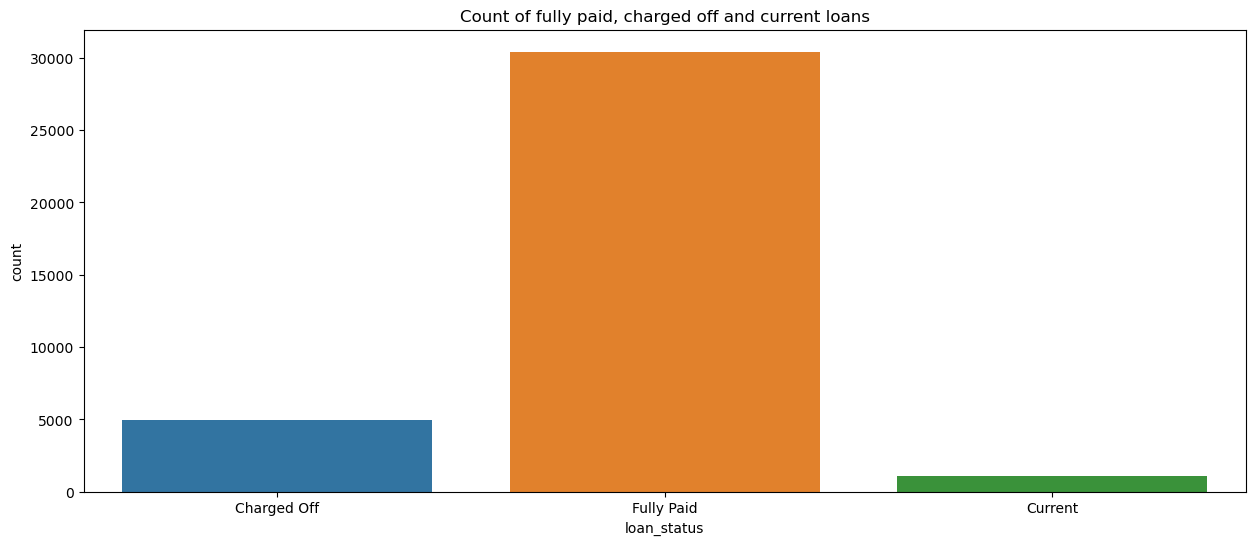

In [743]:
# Printing the values 
plt.style.use('default')
plt.figure(figsize=(15,6))


sns.countplot(data['loan_status'])
plt.title('Count of fully paid, charged off and current loans')
plt.show()

debt_consolidation    17468
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64
debt_consolidation    47.948176
credit_card           12.972469
other                  9.813071
home_improvement       7.424995
major_purchase         5.511789
car                    3.960912
small_business         3.881310
wedding                2.431995
medical                1.740276
moving                 1.452060
house                  0.941506
vacation               0.922291
educational            0.757597
renewable_energy       0.241553
Name: purpose, dtype: float64


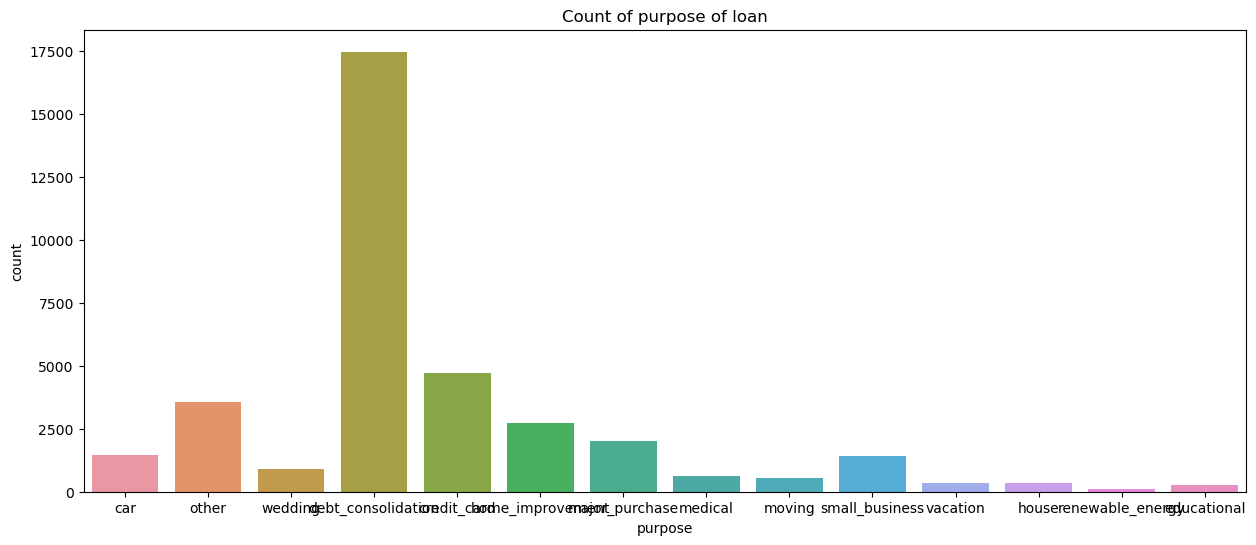

In [744]:
# analysing the purpose column of datset

print(data.purpose.value_counts())
print((data.purpose.value_counts()*100)/len(data))

plt.style.use('default')
plt.figure(figsize=(15,6))
# sns.set_style("dark")

sns.countplot(data['purpose'])
plt.title('Count of purpose of loan')
plt.show()

In [745]:
data.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
1  1077430       2500         2500           2500.0   60 months     15.27   
3  1076863      10000        10000          10000.0   36 months     13.49   
4  1075358       3000         3000           3000.0   60 months     12.69   
5  1075269       5000         5000           5000.0   36 months      7.90   
6  1069639       7000         7000           7000.0   60 months     15.96   

   installment grade sub_grade  emp_length  ... annual_inc  \
1        59.83     C        C4           1  ...    30000.0   
3       339.31     C        C1          10  ...    49200.0   
4        67.79     B        B5           1  ...    80000.0   
5       156.46     A        A4           3  ...    36000.0   
6       170.08     C        C5           8  ...    47004.0   

   verification_status issue_d  loan_status             purpose  \
1      Source Verified  Dec-11  Charged Off                 car   
3      Source Verified  Dec-11   Fully Paid               other   
4      Source Verified  Dec-11      Current               other   
5      Source Verified  Dec-11   Fully Paid             wedding   
6         Not Verified  Dec-11   Fully Paid  debt_consolidation   

                                   title addr_state    dti  \
1                                   bike         GA   1.00   
3                               personel         CA  20.00   
4                               Personal         OR  17.94   
5  My wedding loan I promise to pay back         AZ  11.20   
6                                   Loan         NC  23.51   

   initial_list_status pub_rec_bankruptcies  
1                    f                  0.0  
3                    f                  0.0  
4                    f                  0.0  
5                    f                  0.0  
6                    f                  0.0  

[5 rows x 21 columns]

In [746]:
# creating new column from existing column for analysis

data.issue_d = pd.to_datetime(df7.issue_d, format='%b-%y')
data['year']=df7['issue_d'].dt.year
data['month']=df7['issue_d'].dt.month

Fully Paid     28654
Charged Off     4604
Name: loan_status, dtype: int64


<AxesSubplot:xlabel='loan_status', ylabel='count'>

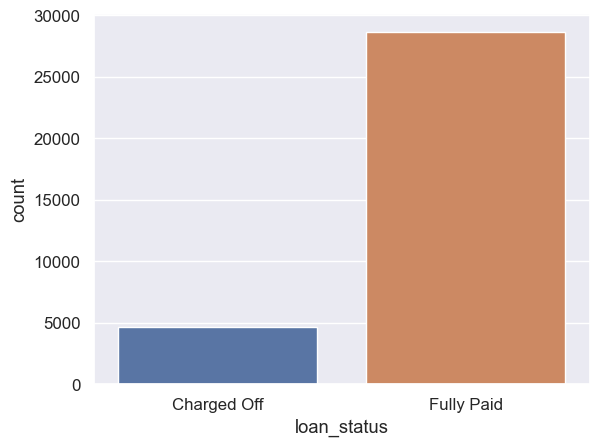

In [799]:
# plotting loan status values

#  current loan status is not providing the exact values for prediction of defaulters as there EMI is still going 
# therefore removing loan status " Current " values
data = data.drop(data[data.loan_status=='Current'].index)       
data.head()   
print(data.loan_status.value_counts())
sns.countplot(data['loan_status'])




# Univariate Analysis

count    35365.000000
mean     11133.179697
std       7326.276639
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


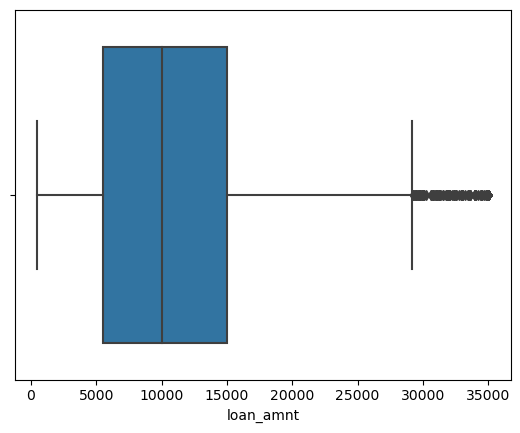

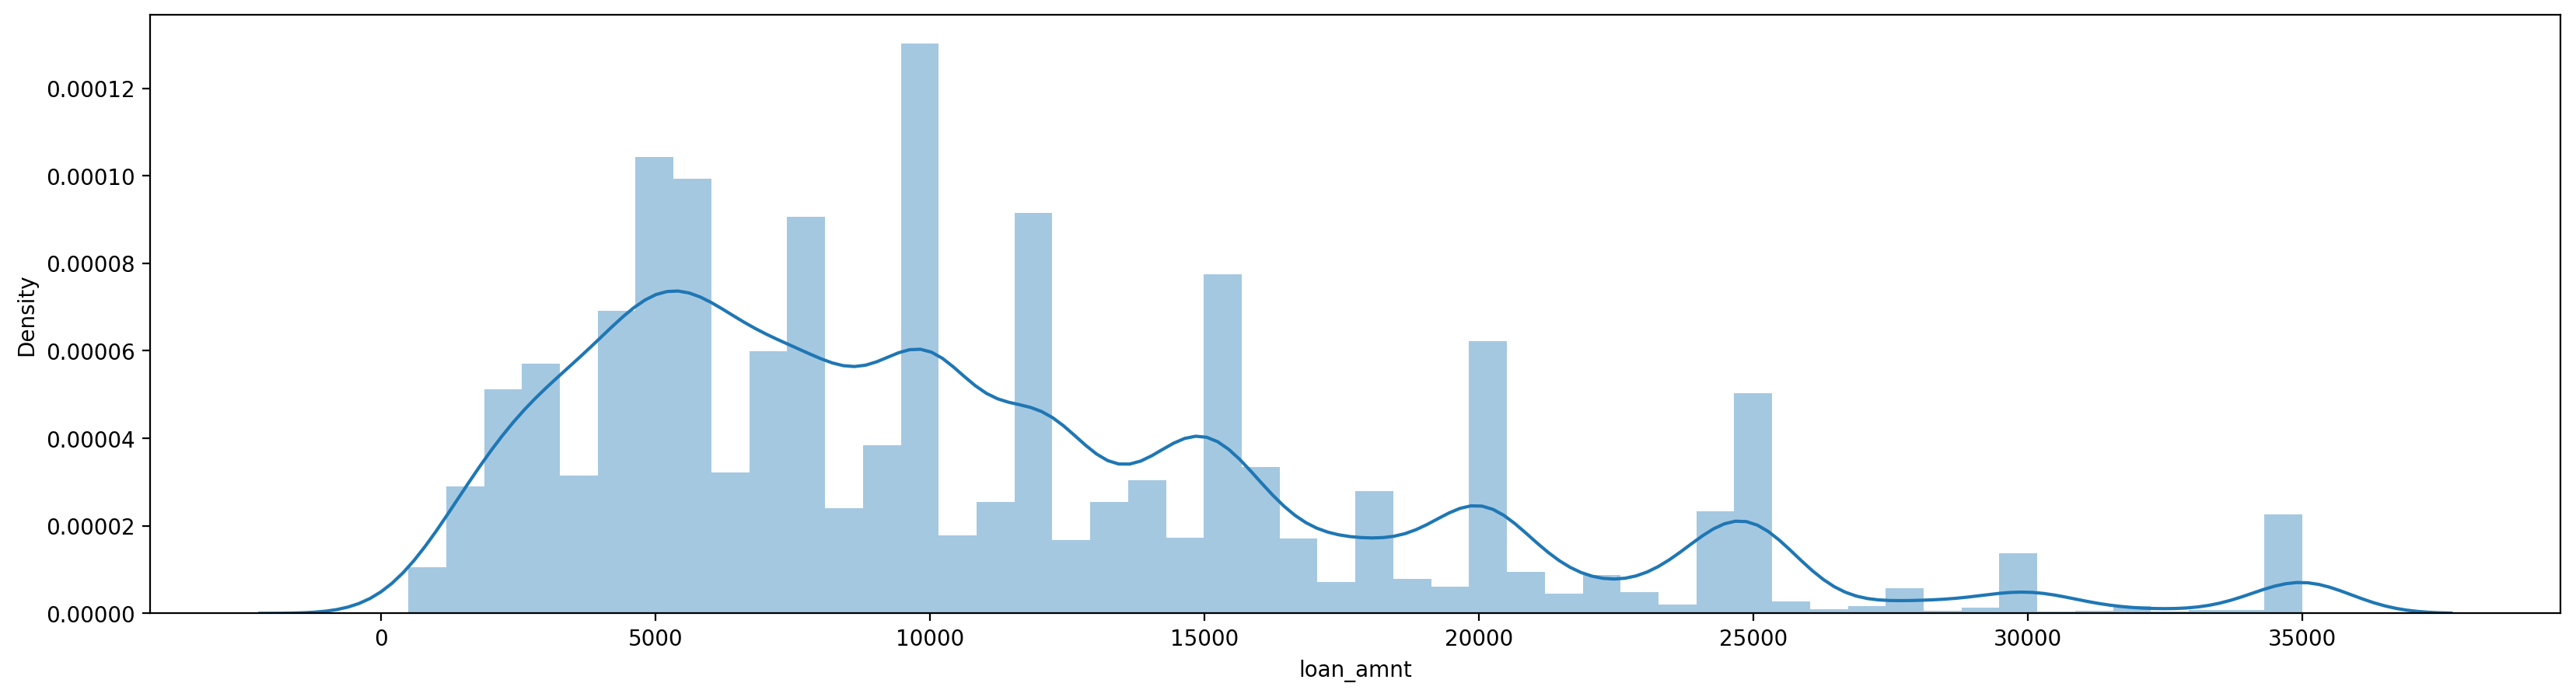

In [748]:
# analysing loan amout column 
# it is continuous numerical column
print(data['loan_amnt'].describe())
sns.boxplot(data.loan_amnt)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.loan_amnt)
plt.show()

count    35365.000000
mean     10866.618832
std       7069.620552
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


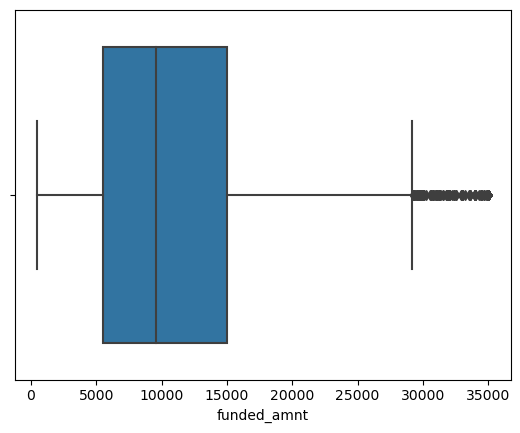

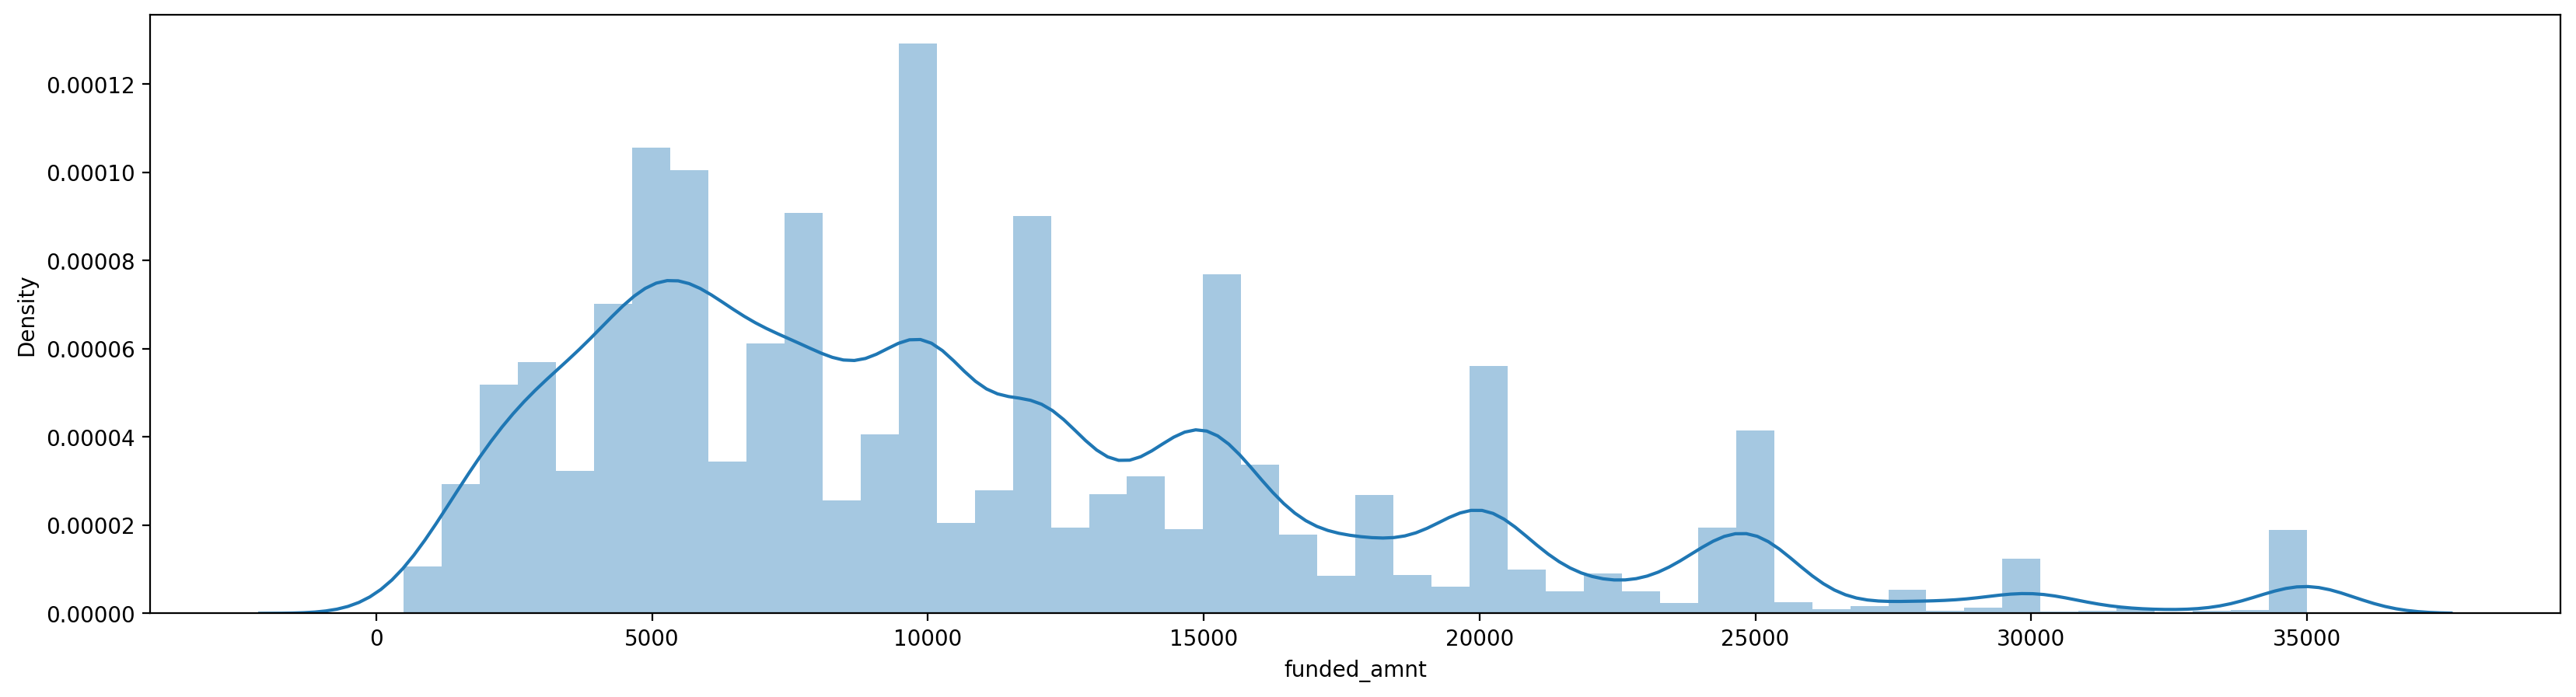

In [749]:
# analysing funded amount column 
# it is continuous numerical column
print(data['funded_amnt'].describe())
sns.boxplot(data.funded_amnt)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.funded_amnt)
plt.show()

count    35365.000000
mean     10427.681981
std       6968.144008
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14300.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


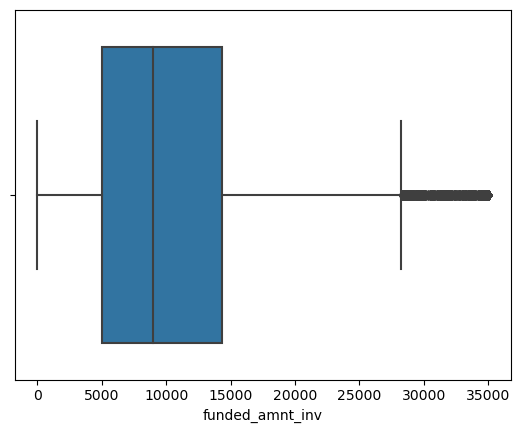

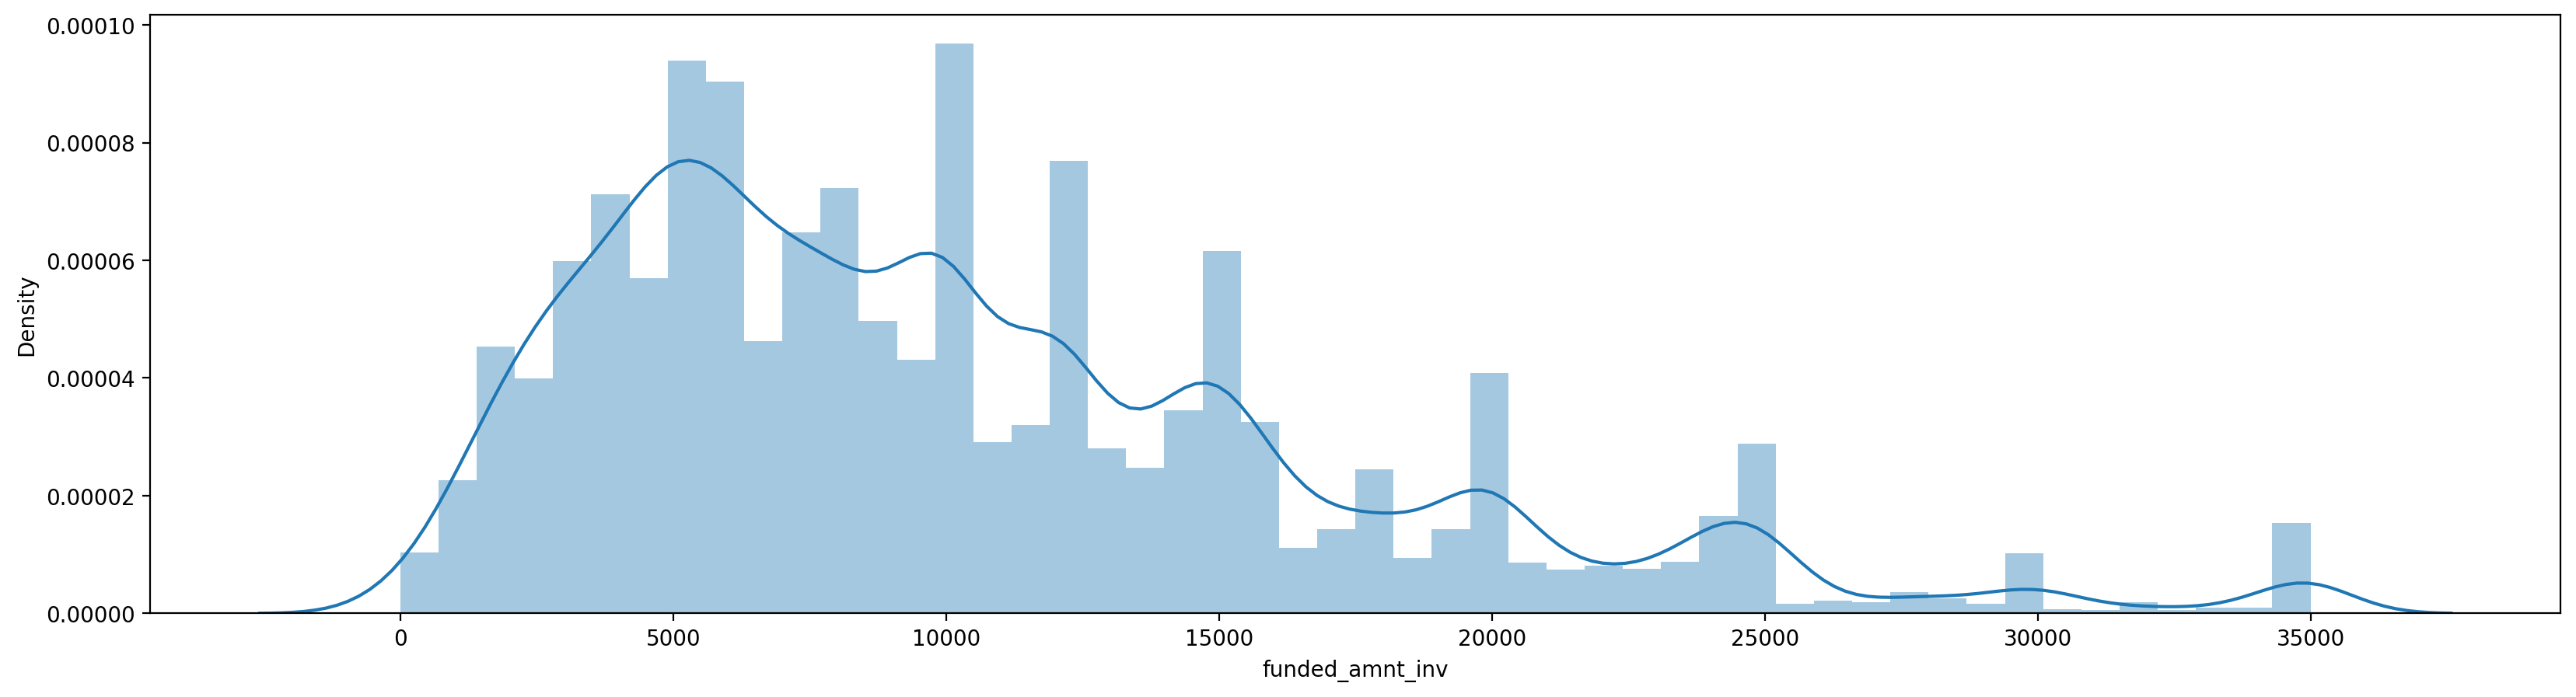

In [750]:
# analysing funded_amnt_inv column 
# it is continuous numerical column
print(data['funded_amnt_inv'].describe())
sns.boxplot(data.funded_amnt_inv)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.funded_amnt_inv)
plt.show()

Before Removal of Outliers :

count    3.536500e+04
mean     6.909774e+04
std      6.396843e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count     35009.000000
mean      65694.972882
std       34378.805002
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81000.000000
max      228000.000000
Name: annual_inc, dtype: float64


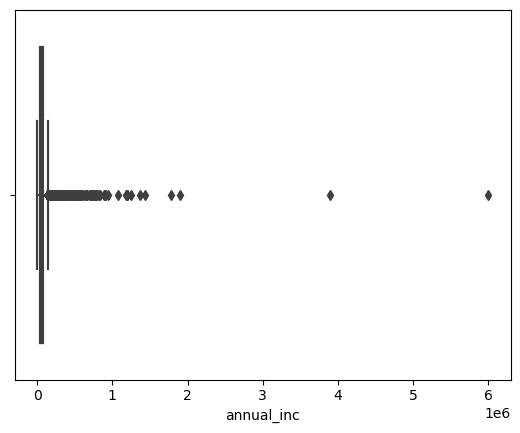

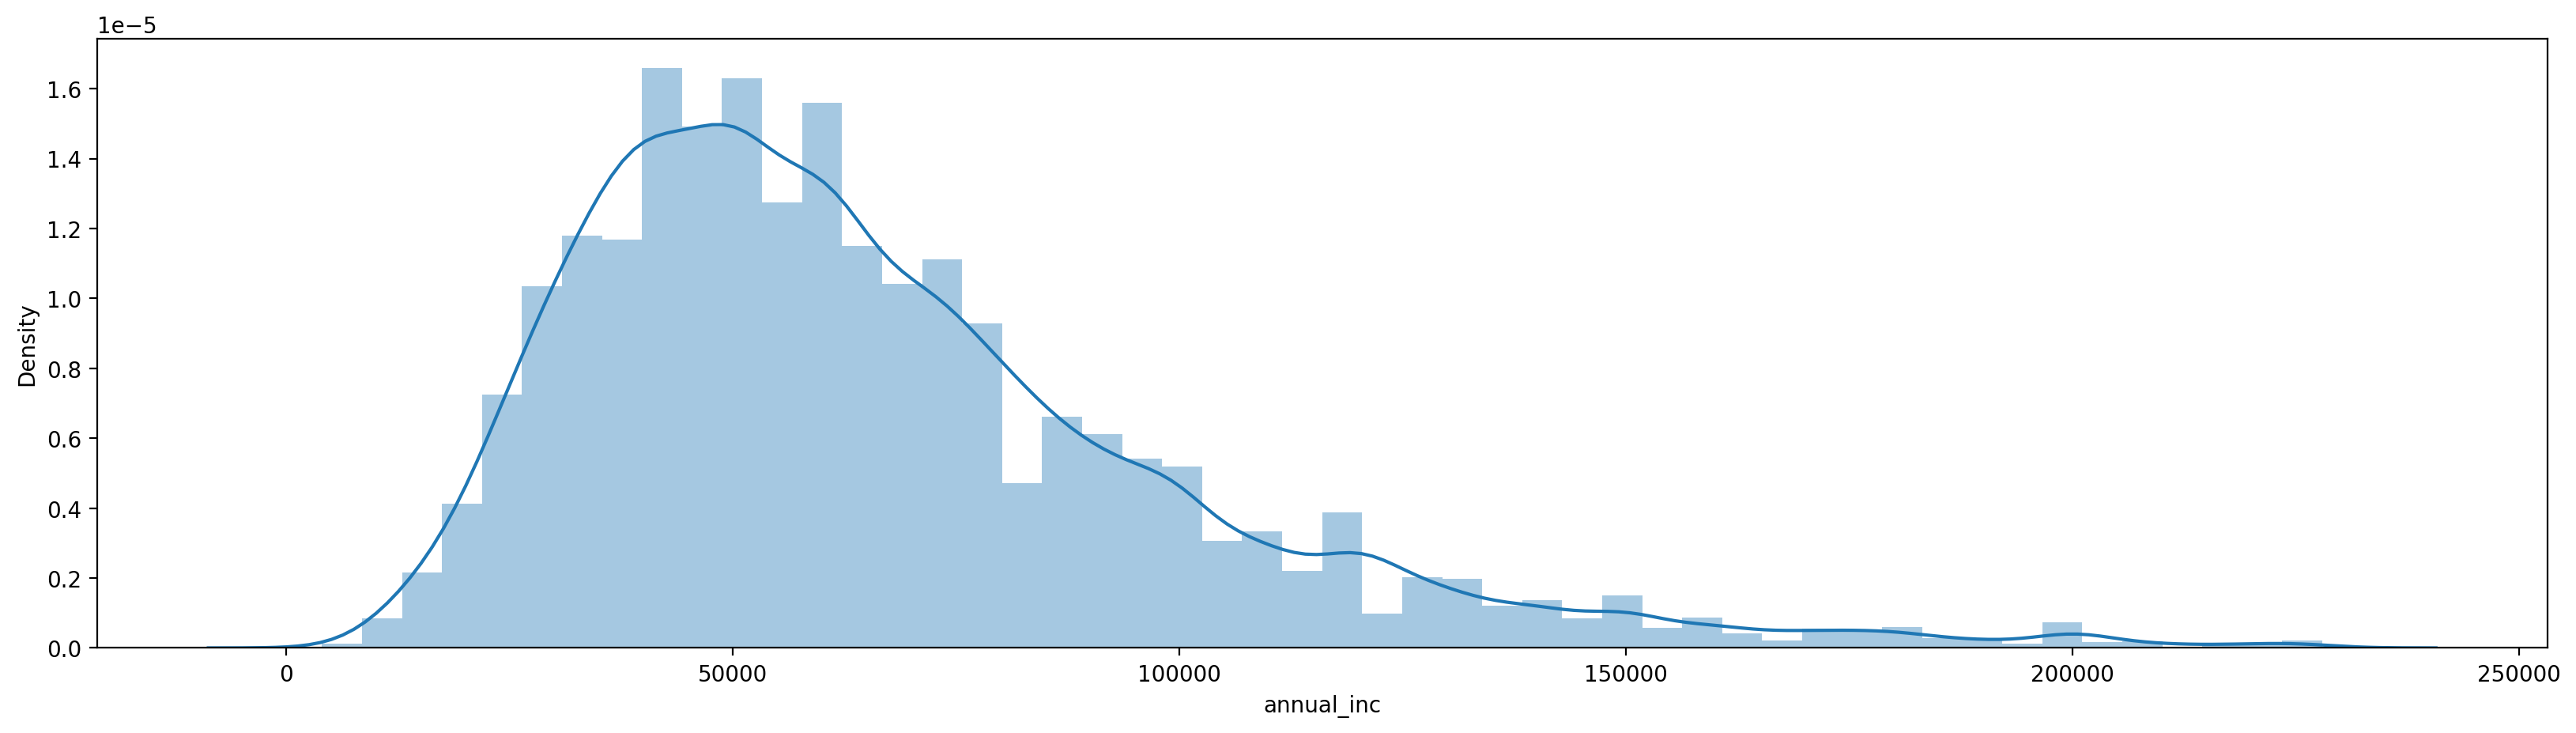

In [751]:

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.  

print('Before Removal of Outliers :\n')
print(data['annual_inc'].describe())
sns.boxplot(data.annual_inc)


data = data[data["annual_inc"] < data["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(data["annual_inc"].describe())
sns.boxplot(data.annual_inc)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.annual_inc)
plt.show()

count    35009.000000
mean        11.968036
std          3.695473
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64


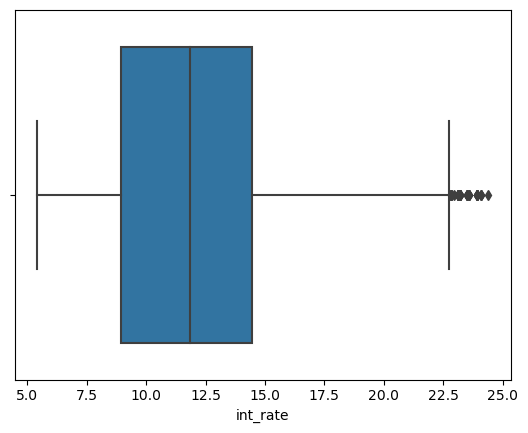

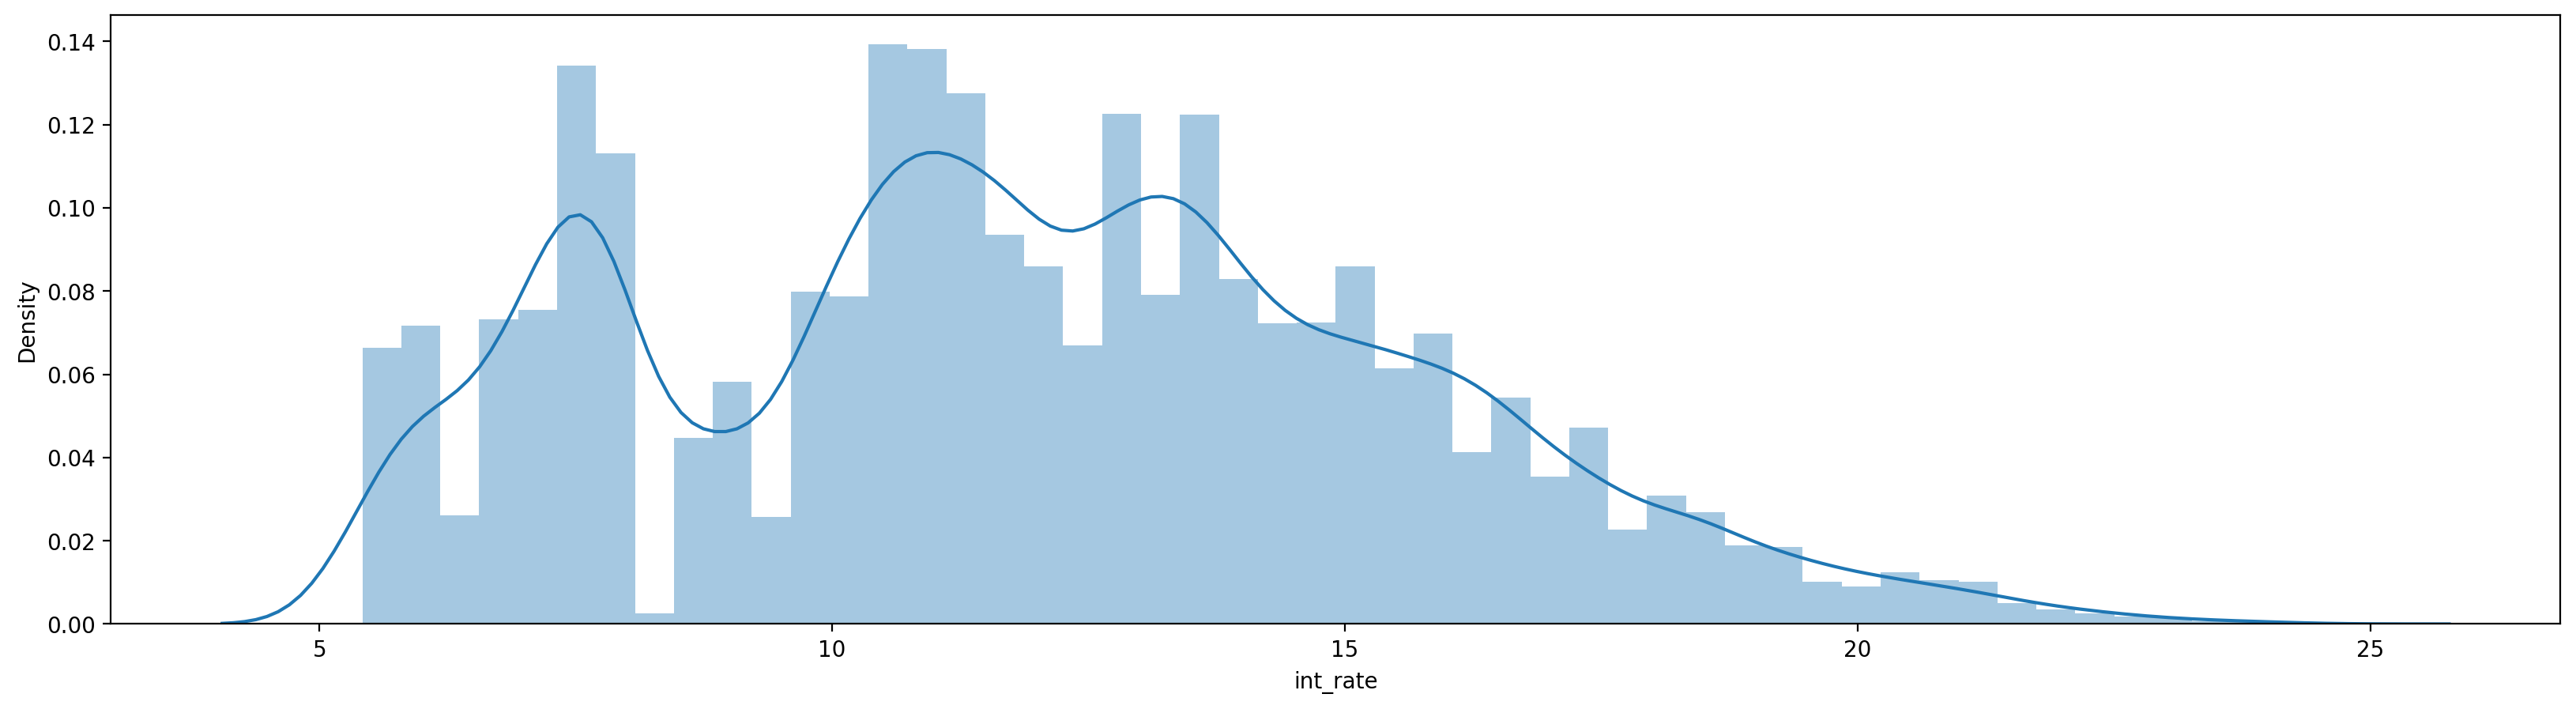

In [752]:
# plotting interest rate 
# analysing interest rate column

print(data['int_rate'].describe())
sns.boxplot(data.int_rate)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.int_rate)
plt.show()

count    35009.000000
mean       321.571287
std        204.586609
min         16.080000
25%        167.530000
50%        279.100000
75%        423.610000
max       1305.190000
Name: installment, dtype: float64


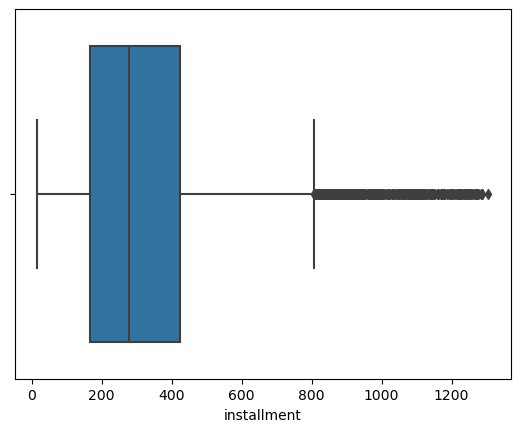

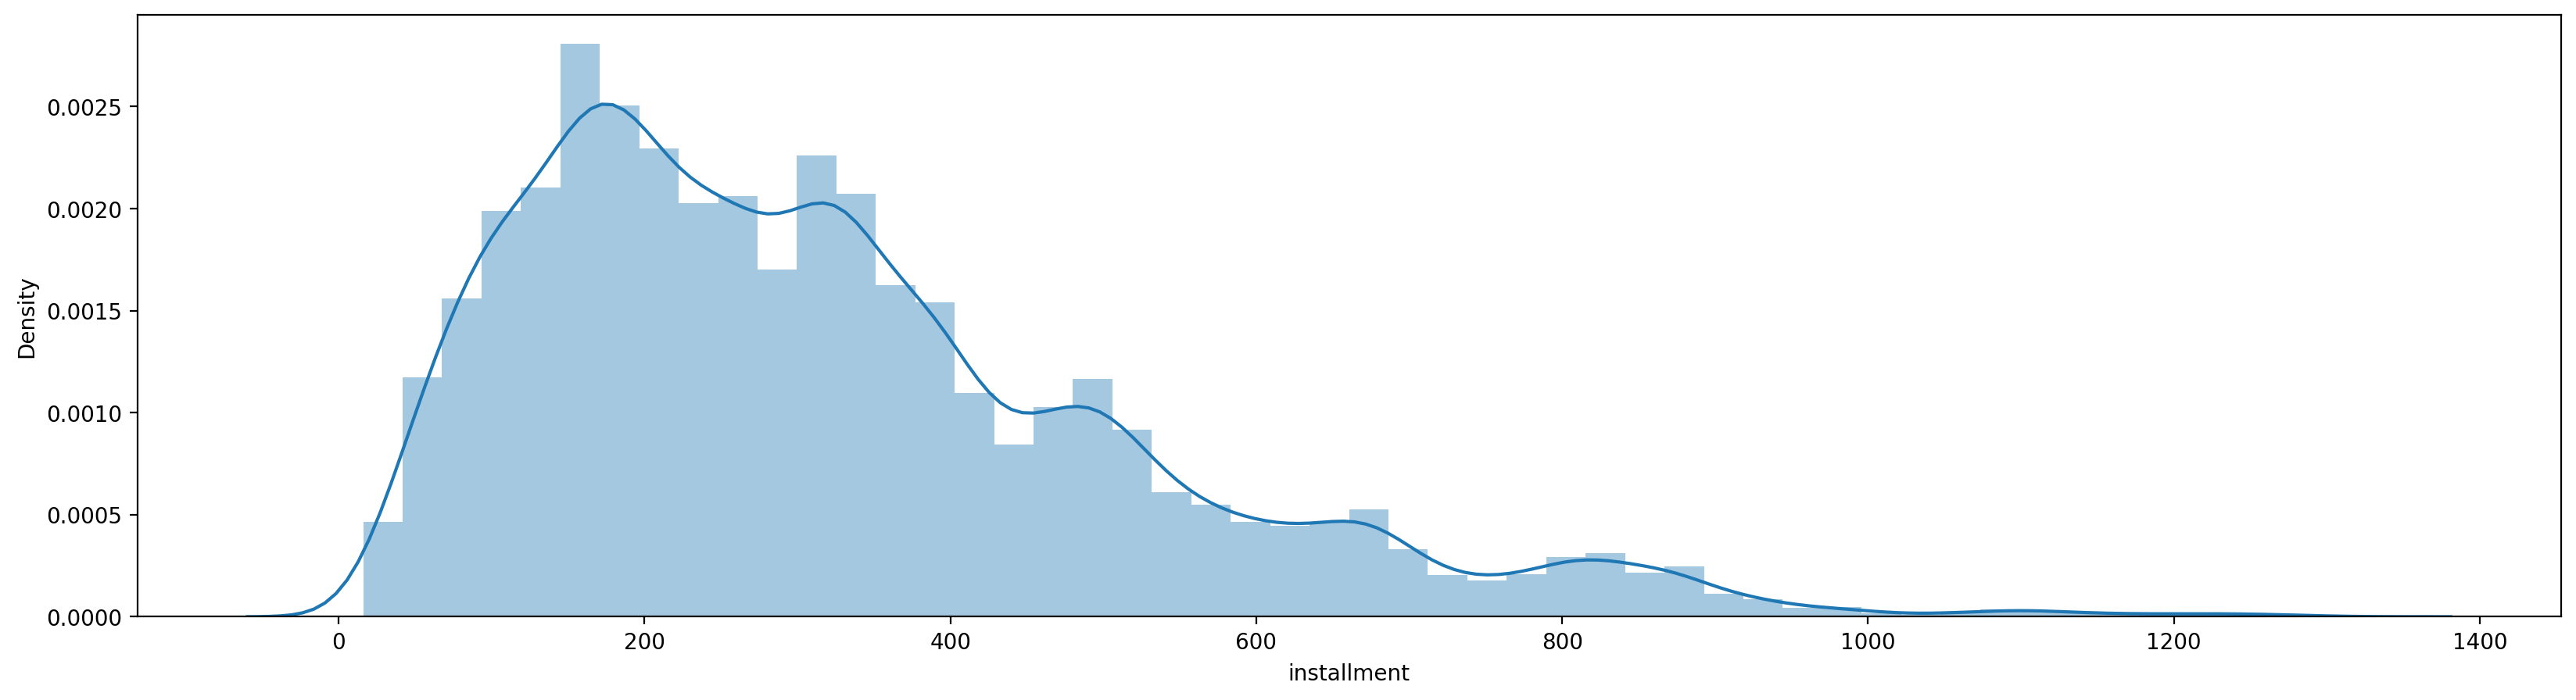

In [753]:
# plotting installment
# analysing installment column
print(data['installment'].describe())
sns.boxplot(data.installment)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.installment)
plt.show()


In [754]:
# Removing Outliers from Installment column 
# AS some installments are greater than 100
data = data[data["installment"] < data["installment"].quantile(0.95)]

count    33258.000000
mean       292.711431
std        163.650876
min         16.080000
25%        163.640000
50%        266.400000
75%        393.542500
max        741.310000
Name: installment, dtype: float64


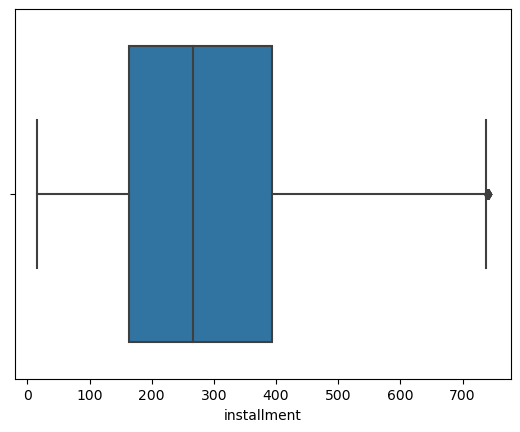

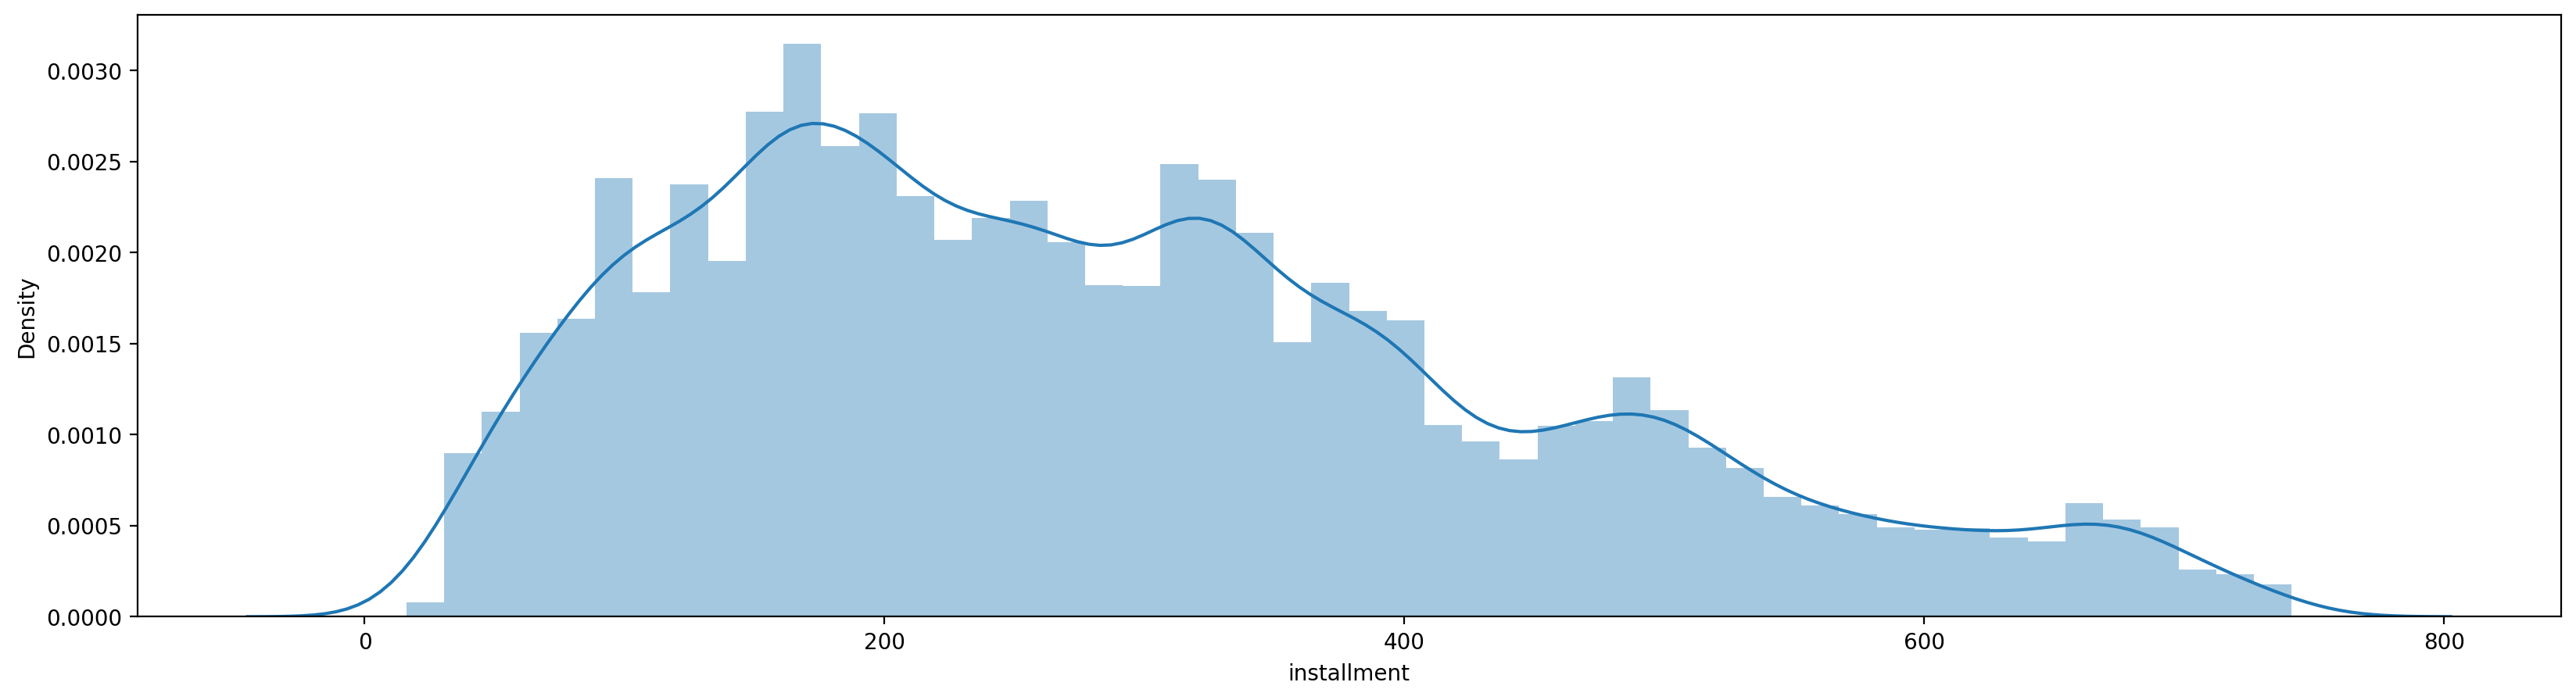

In [755]:
# Plotting installments column after removing outliers
print(data['installment'].describe())
sns.boxplot(data.installment)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.installment)
plt.show()

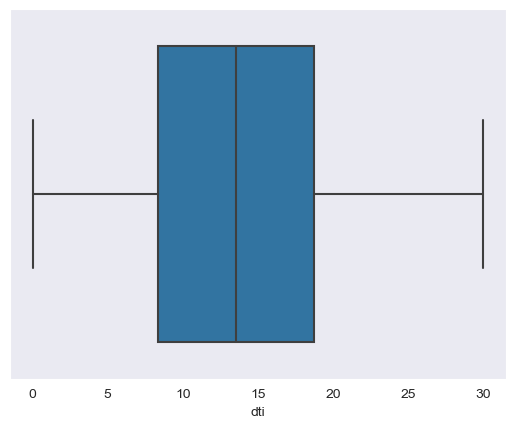

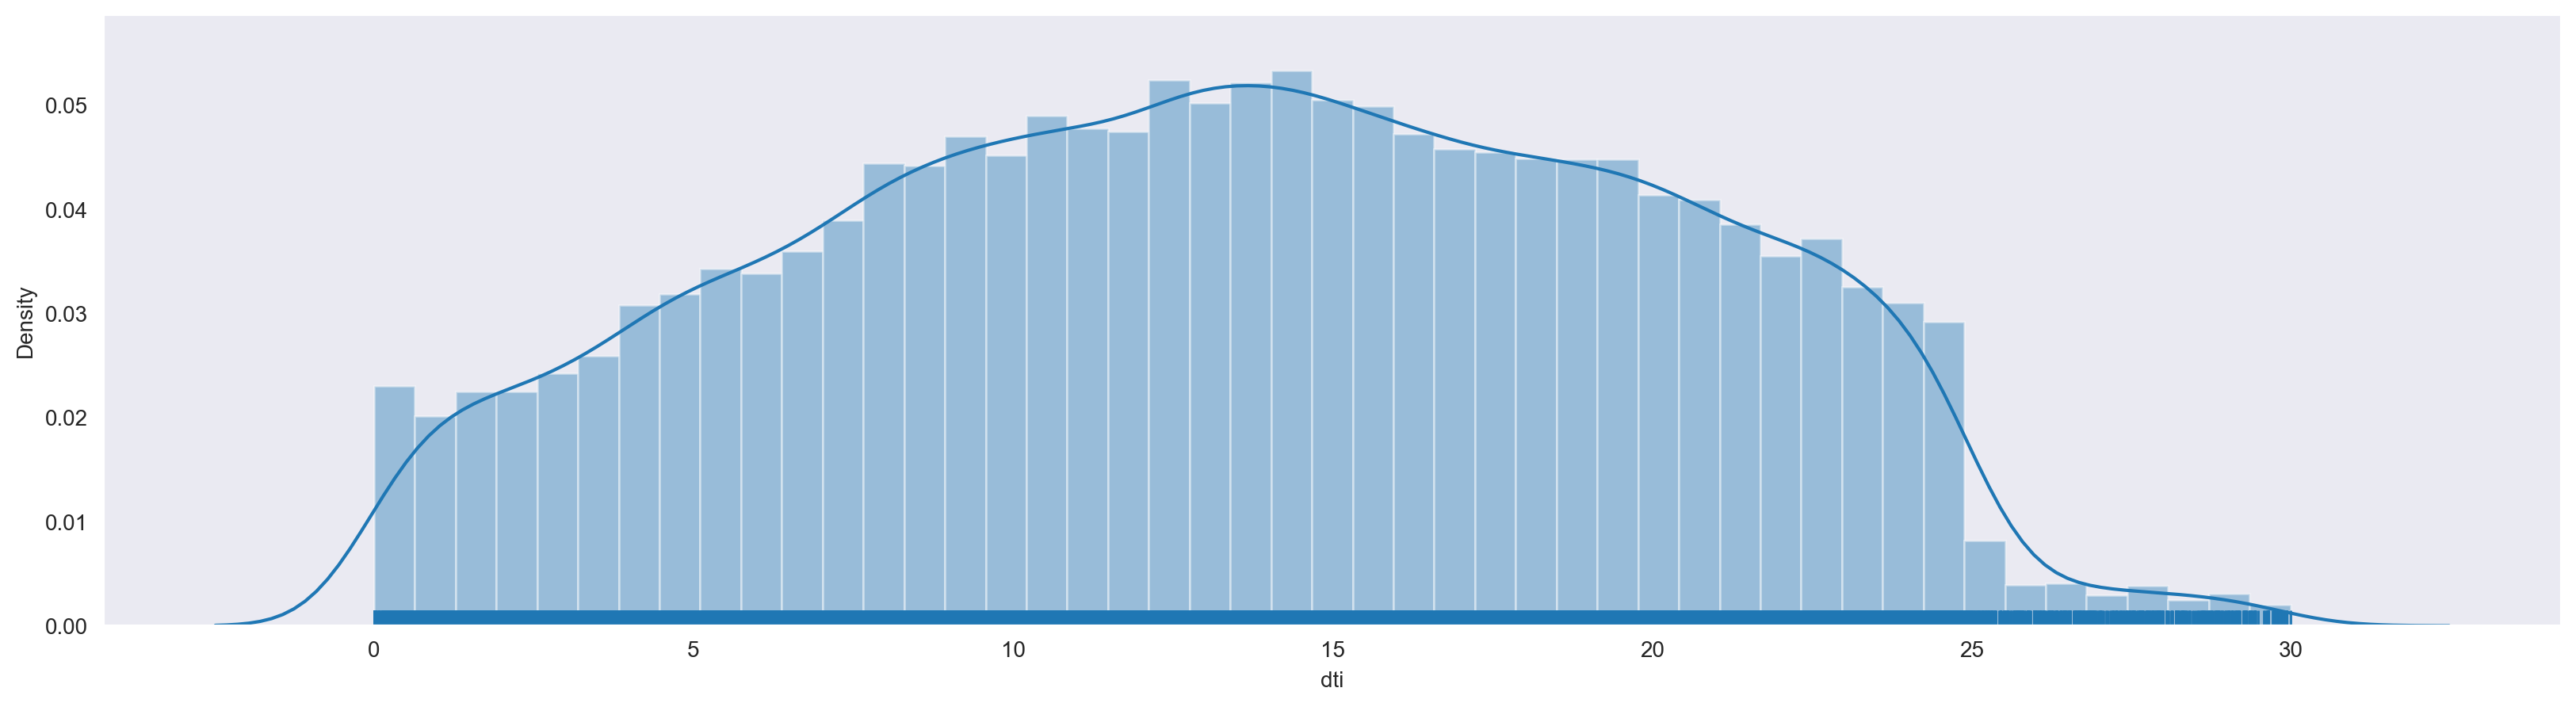

In [756]:
# plotting debt to income ratio
sns.set_style("dark")
data.dti.describe()
sns.boxplot(data.dti)
plt.show()
plt.figure(figsize = (20,5), dpi = 200)
sns.distplot(data.dti,rug=True)
plt.show()

count          33258
unique             2
top        36 months
freq           24873
Name: term, dtype: object
 36 months    24873
 60 months     8385
Name: term, dtype: int64


<AxesSubplot:xlabel='term', ylabel='count'>

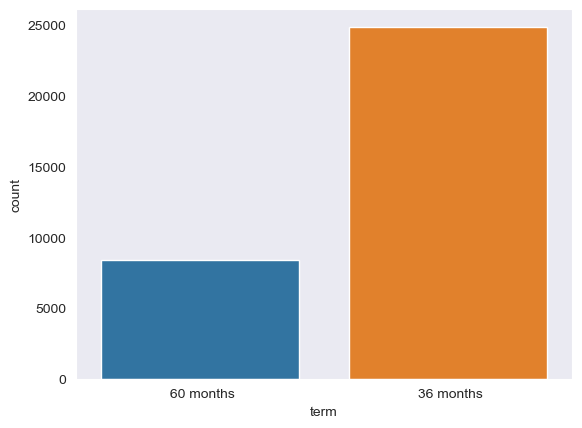

In [757]:
# Plotting terms column from dataset
# It is categorical column
print(data['term'].describe())
print(data['term'].value_counts())
sns.countplot(data.term)

#Observations :
# There are only two loan terms 36 and 60 months. Around 75% borrowers took loans with 36 months term. 


In [758]:
data.term.value_counts()

 36 months    24873
 60 months     8385
Name: term, dtype: int64

count     33258
unique        4
top        RENT
freq      16377
Name: home_ownership, dtype: object
RENT        16377
MORTGAGE    14413
OWN          2379
OTHER          89
Name: home_ownership, dtype: int64


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

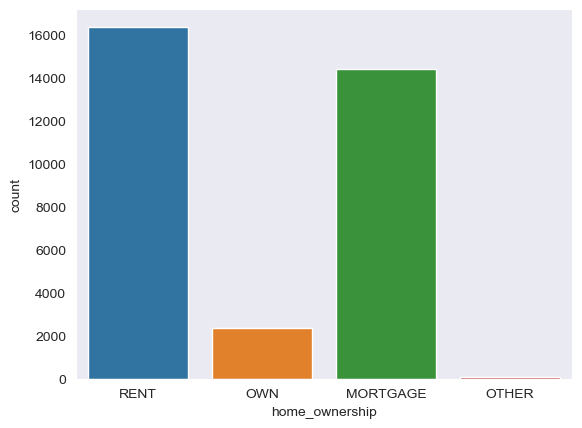

In [759]:
# Printing wether the person have house 
# plotting wether person have his own house or rented house
print(data['home_ownership'].describe())
print(data['home_ownership'].value_counts())
sns.countplot(data.home_ownership)

count    33258.000000
mean         5.040562
std          3.377014
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


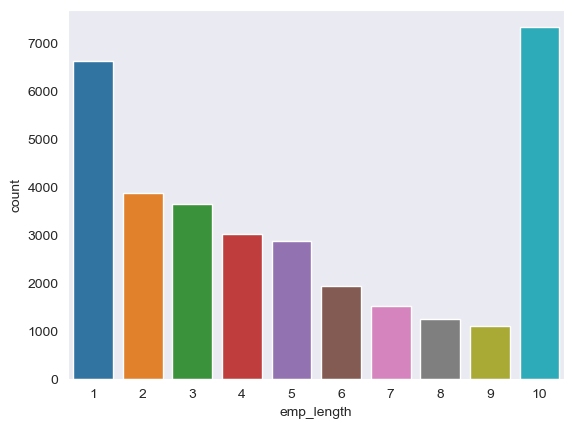

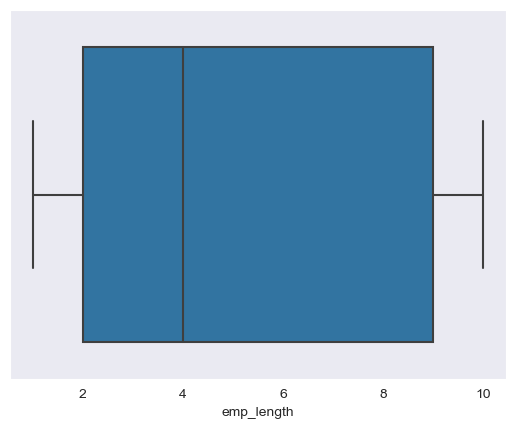

In [760]:
# plotting Employee lenght  
print(data['emp_length'].describe())
sns.countplot(data.emp_length)
plt.show()
sns.set_style("dark")
sns.boxplot(data.emp_length)
plt.show()


count            33258
unique               3
top       Not Verified
freq             14564
Name: verification_status, dtype: object
Not Verified       14564
Verified            9828
Source Verified     8866
Name: verification_status, dtype: int64


<AxesSubplot:xlabel='verification_status', ylabel='count'>

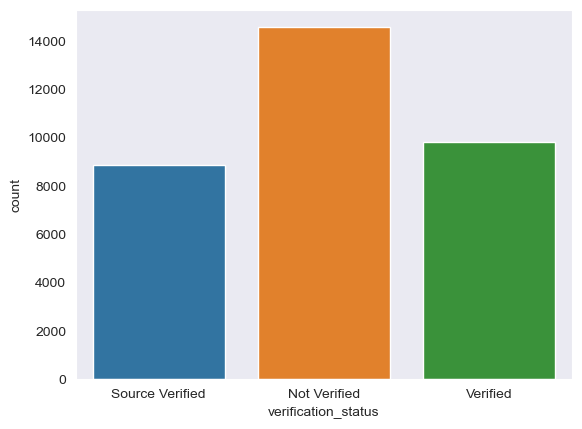

In [761]:
# plotting verification status when loan is given
print(data['verification_status'].describe())
print(data['verification_status'].value_counts())
sns.countplot(data.verification_status)

count     33258
unique        7
top           B
freq      10131
Name: grade, dtype: object
B    10131
A     8922
C     6863
D     4248
E     2164
F      730
G      200
Name: grade, dtype: int64


<AxesSubplot:xlabel='grade', ylabel='count'>

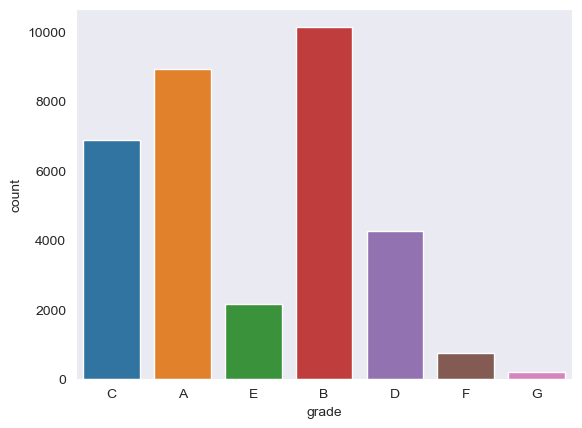

In [762]:
# plotting grade count when loan is given
print(data['grade'].describe())
print(data['grade'].value_counts())
sns.countplot(data.grade)

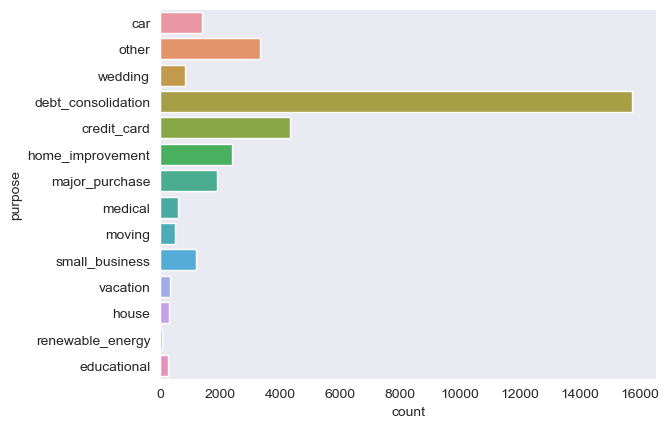

In [763]:
# plotting the count of purpose column values
# loan taken for which differnt purposes
sns.countplot(y="purpose",data=data)
plt.show()

count     33258
unique       35
top          A4
freq       2564
Name: sub_grade, dtype: object
A4    2564
A5    2420
B3    2412
B5    2305
B4    2117
C1    1767
B2    1738
C2    1715
A3    1602
B1    1559
A2    1336
C3    1326
D2    1095
C4    1056
A1    1000
C5     999
D3     934
D1     772
D4     759
D5     688
E1     619
E2     504
E3     417
E4     348
E5     276
F1     237
F2     183
F3     127
F4     109
F5      74
G1      59
G2      51
G4      40
G3      31
G5      19
Name: sub_grade, dtype: int64


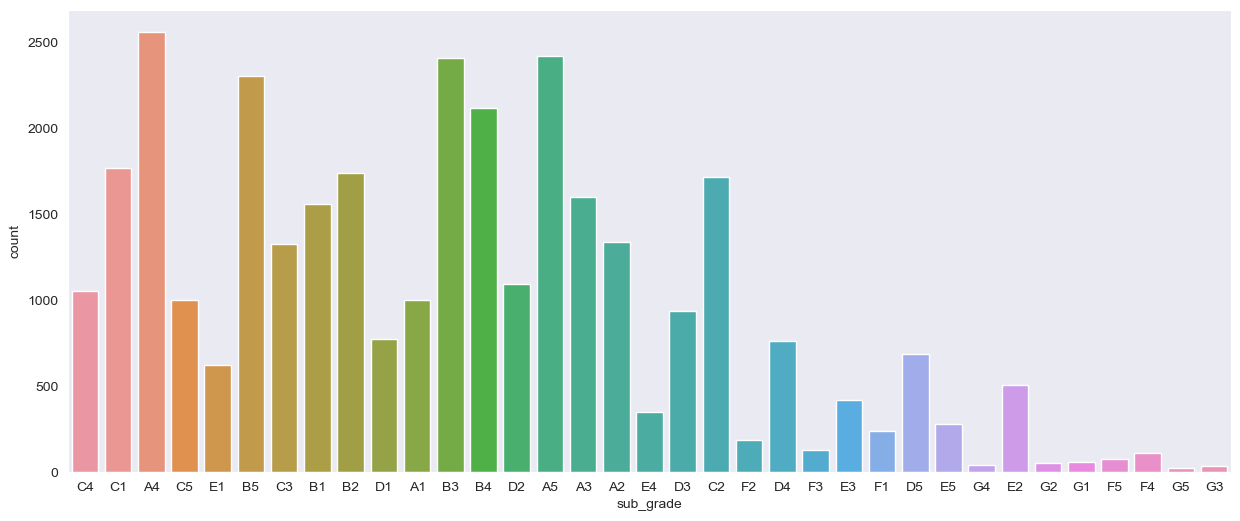

In [764]:
# plotting the counts of subgrade 


print(data['sub_grade'].describe())
print(data['sub_grade'].value_counts())
plt.figure(figsize=(15,6))
sns.countplot(data.sub_grade)
plt.show()

# Bivariate analysis-
## when  we compare two columns with each other it is bivariate analysis

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

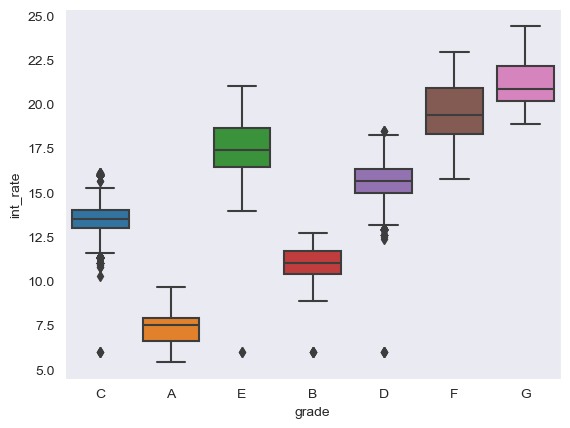

In [765]:
#plotting box plot of grade VS Interest rate
# some grades have high interest rates
# It shows variation

sns.boxplot(x = 'grade',y = 'int_rate', data = data)

<AxesSubplot:xlabel='term', ylabel='int_rate'>

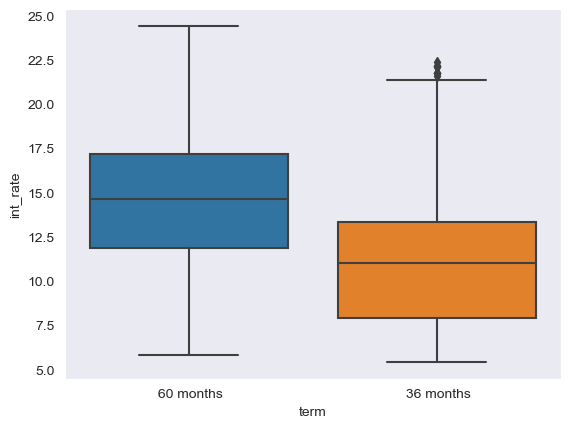

In [766]:
#plotting box plot of term VS Interest rate
# It shows higher the term higher interest rate 


sns.boxplot(x = 'term',y = 'int_rate', data = data)

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

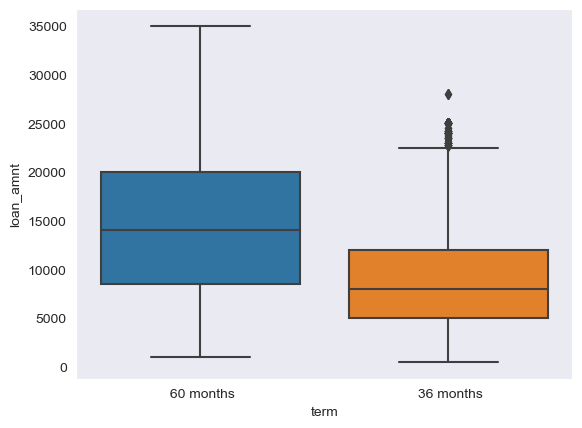

In [767]:
#plotting box plot for term VS loan amount
# It shows higher loan amount need higher interest rate
sns.boxplot(x = 'term',y = 'loan_amnt', data = data)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

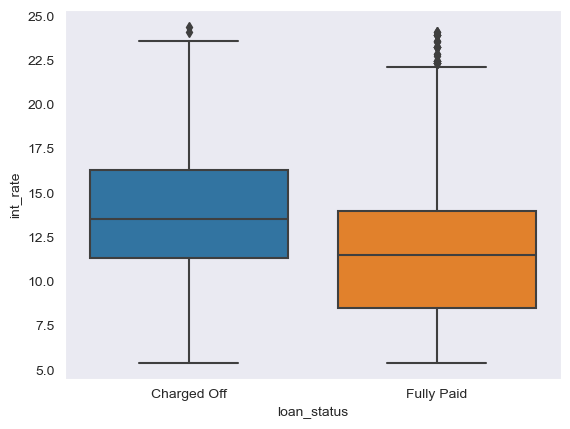

In [768]:
# plotting box plot for interest rate VS loan status
# It shows loans with higher interest rate are likely to charge off
sns.boxplot(x = 'loan_status',y = 'int_rate', data = data)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

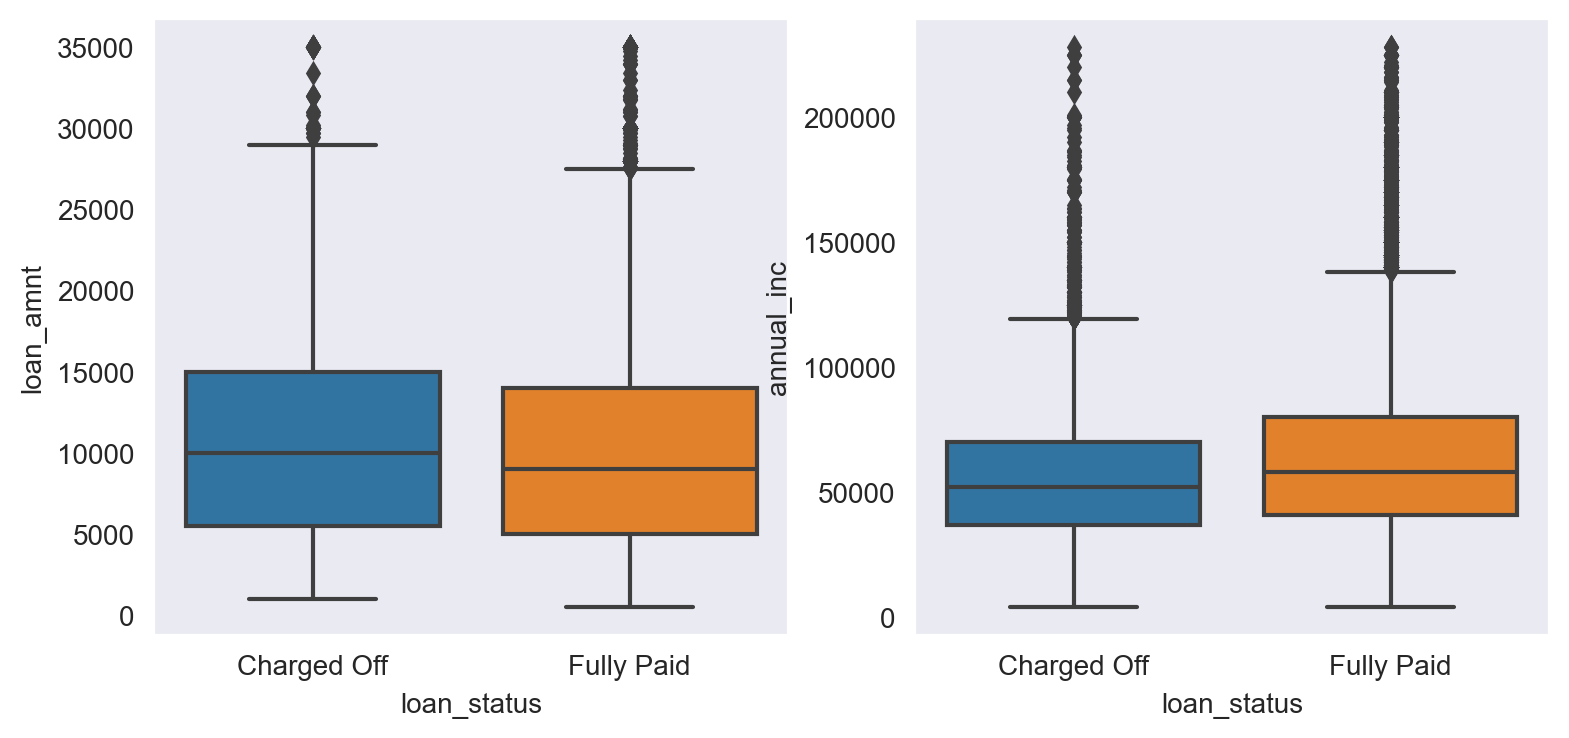

In [769]:
#plotting box plot for loan amount V loan status
# it is showing no significant difference in  loan about for loan status


fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.boxplot(x = 'loan_status',y = 'loan_amnt', data = data)
#plotting box plot for annual income V loan status
# it is showing no significant difference in  loan about for loan status
p2 = fig.add_subplot(1,2,2)
sns.boxplot(x = 'loan_status',y = 'annual_inc', data = data)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

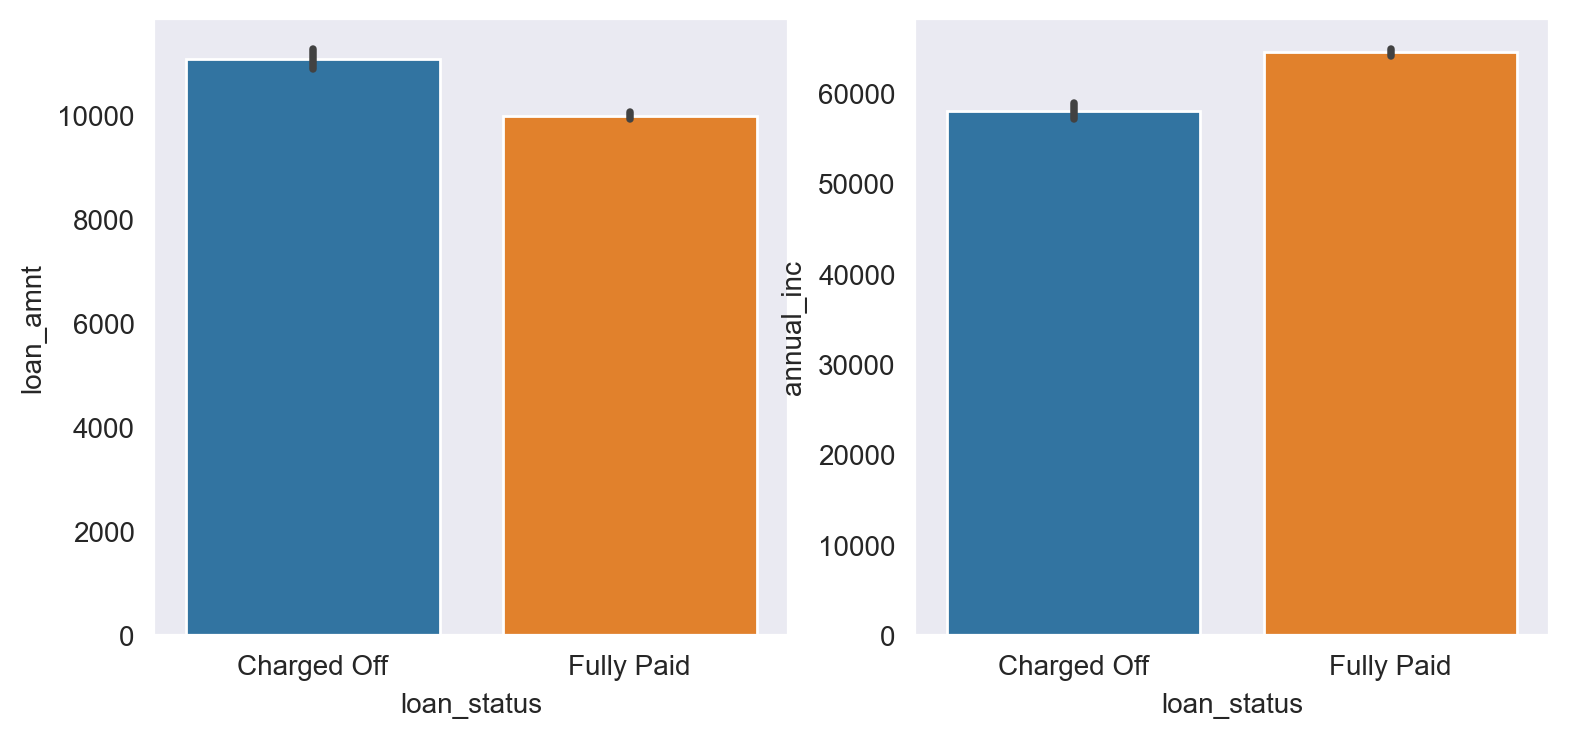

In [770]:
fig = plt.figure(figsize = (9,4), dpi = 200)
p1 = fig.add_subplot(1,2,1)
sns.barplot(x = 'loan_status',y = 'loan_amnt', data = data)
p2 = fig.add_subplot(1,2,2)
sns.barplot(x = 'loan_status',y = 'annual_inc', data = data)

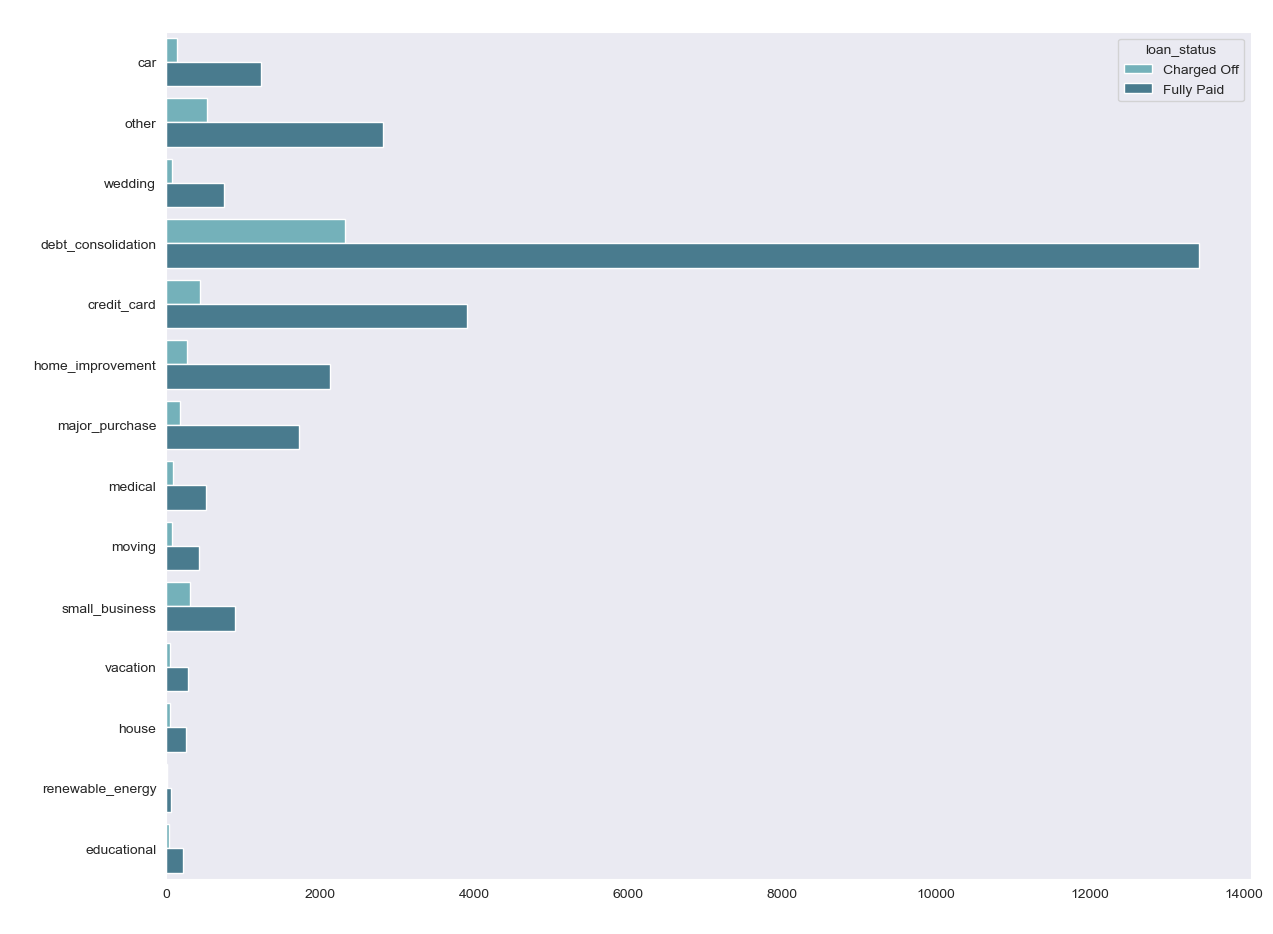

In [771]:
# analysis of Categorical Variables - Purpose Of Loan

plt.figure(figsize=(14,11))
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()


# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

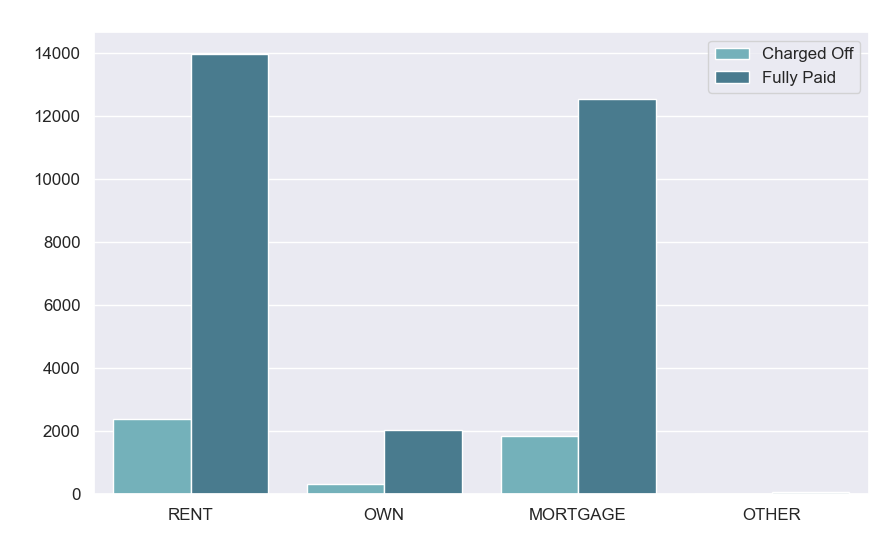

In [800]:
# analysis of - Home Ownership column VS loan Status

plt.figure(figsize=(10,6))
ax = sns.countplot(x="home_ownership",data=data,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()


# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too


# observation:
#Borrowers with mortgage home ownership are taking higher loans and defaulting the approved loans.

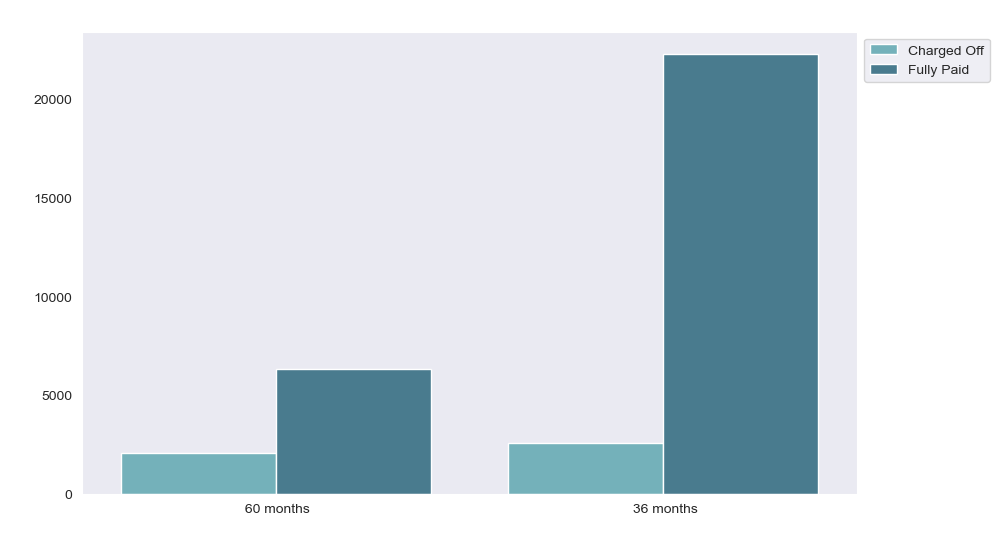

In [773]:
# analysis of Loan Paying Term VS loan Status

plt.figure(figsize=(10,6))
ax = sns.countplot(x="term",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

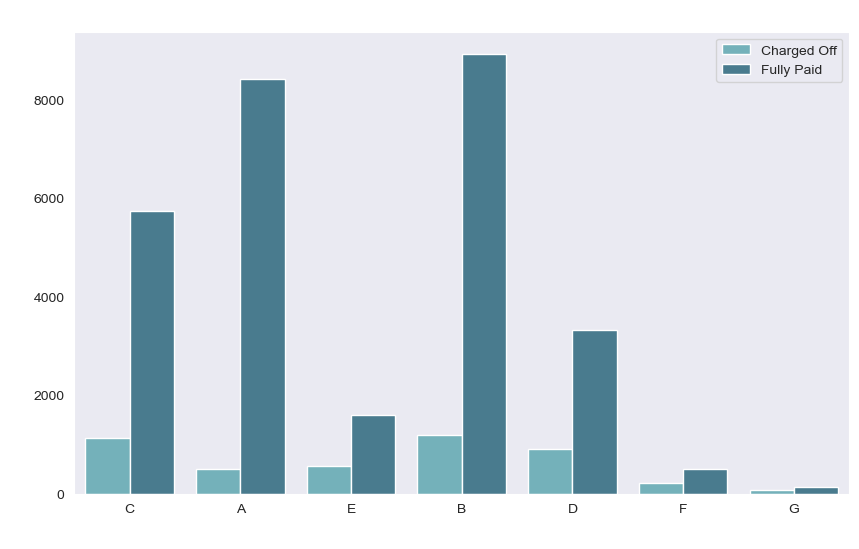

In [774]:
# = Analysis Loan Paying Term VS loan Status column

plt.figure(figsize=(10,6))
ax = sns.countplot(x="grade",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

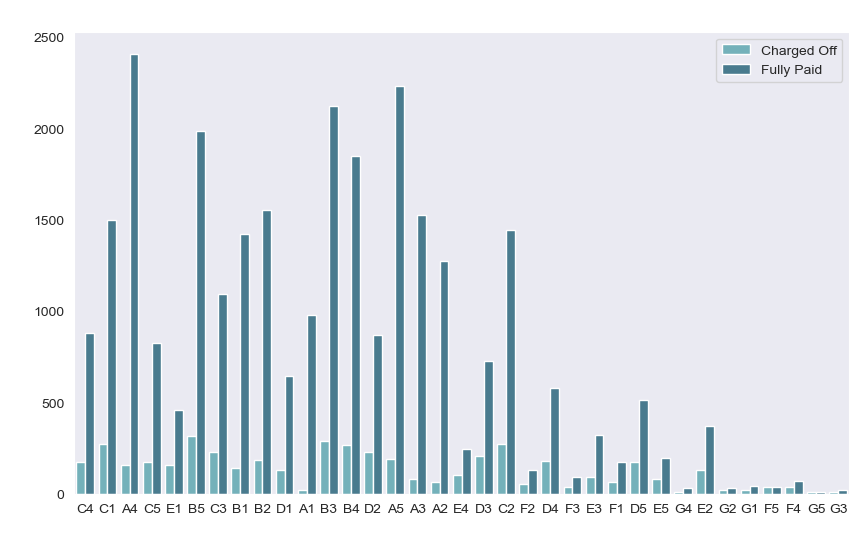

In [775]:
#  Analysis Loan Paying Term VS loan status  Coloumn

plt.figure(figsize=(10,6))
ax = sns.countplot(x="sub_grade",data=data,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()


# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

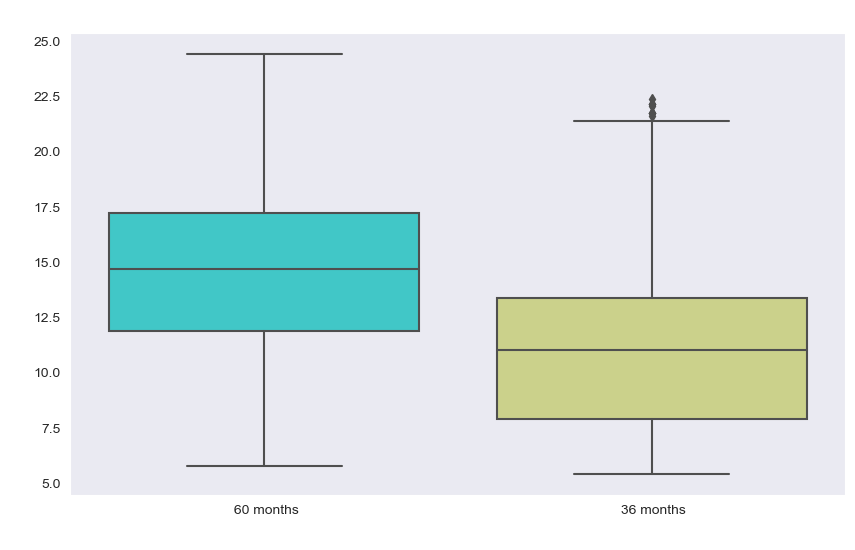

In [776]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =data,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

In [777]:
# hv Plot is a library to plot interactive plots 
# this provodes very interactive plots for detailed analysis

In [778]:
!pip install -q hvplot
import hvplot.pandas

In [779]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [780]:
employee_length = data.hvplot.hist(
    y='emp_length', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="employeeLenght by Loan Status", 
    xlabel='EmployeeLength', ylabel='Counts', legend='top'
)
installment

:NdOverlay   [loan_status]
   :Histogram   [installment]   (installment_count)

In [781]:
# generating new columns from extisting columns to get detailed understanding 


In [782]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -
# Chargedoff_Proportion - value shows the percentage counts charged off
data['annual_inc_cats'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])
inc_range_vs_loan = data.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion %'] = (inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total'])*100
inc_range_vs_loan


# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status annual_inc_cats  Charged Off  Fully Paid  Total  \
0                   0-20000          162         716    878   
1               20000-40000         1303        6297   7600   
2               40000-60000         1513        8775  10288   
3               60000-80000          851        5904   6755   
4                   80000 +          775        6962   7737   

loan_status  Chargedoff_Proportion %  
0                          18.451025  
1                          17.144737  
2                          14.706454  
3                          12.598075  
4                          10.016802

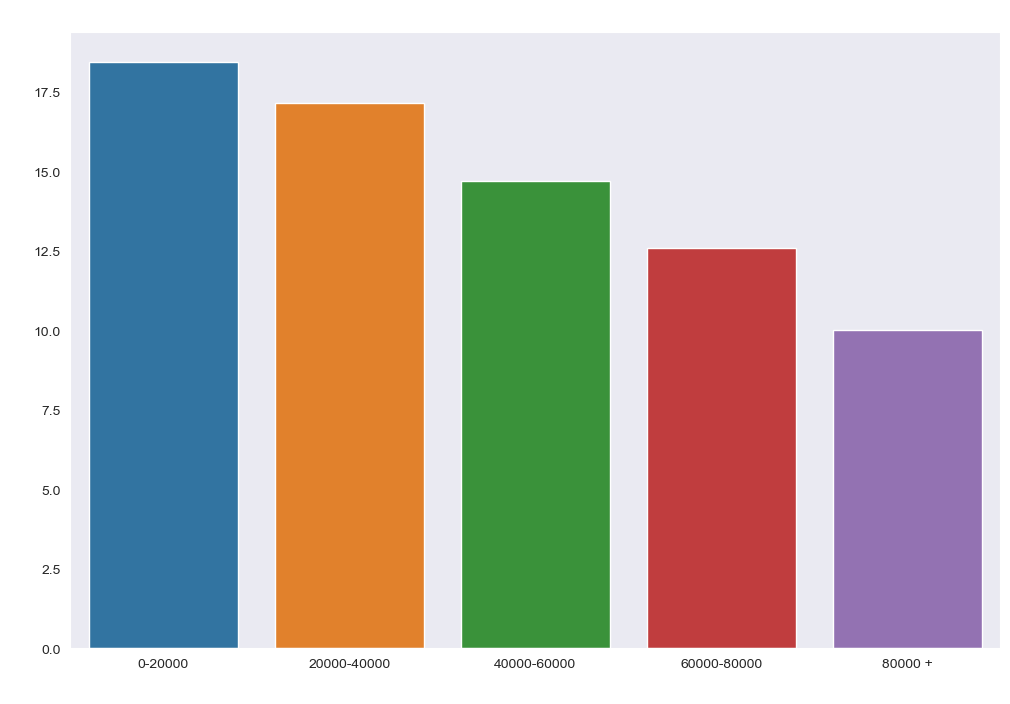

In [783]:

# Bivariate Analysis on annual income against Chargedoff_Proportion -

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('annual_income vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion %', data=inc_range_vs_loan)
ax1.set_xlabel('annual_inc_cats',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

In [784]:
# Bivariate Analysis on laan amount against Chargedoff_Proportion -

data['loan_amount'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])
loan_amnt_vs_loan = data.groupby(['loan_amount', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
loan_amnt_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + loan_amnt_vs_loan['Fully Paid'] 
loan_amnt_vs_loan['Chargedoff_Proportion %'] = (loan_amnt_vs_loan['Charged Off'] / loan_amnt_vs_loan['Total'])*100
loan_amnt_vs_loan


# loan amount from 7000- 28000 are has higher proprtion and are more likely to chrarge off


loan_status  loan_amount  Charged Off  Fully Paid  Total  \
0                 0-7000         1590       11230  11392   
1             7000-14000         1583       10662  11965   
2            14000-21000         1033        5431   6944   
3            21000-28000          339        1136   1987   
4                28000 +           59         195    970   

loan_status  Chargedoff_Proportion %  
0                          13.957163  
1                          13.230255  
2                          14.876152  
3                          17.060896  
4                           6.082474

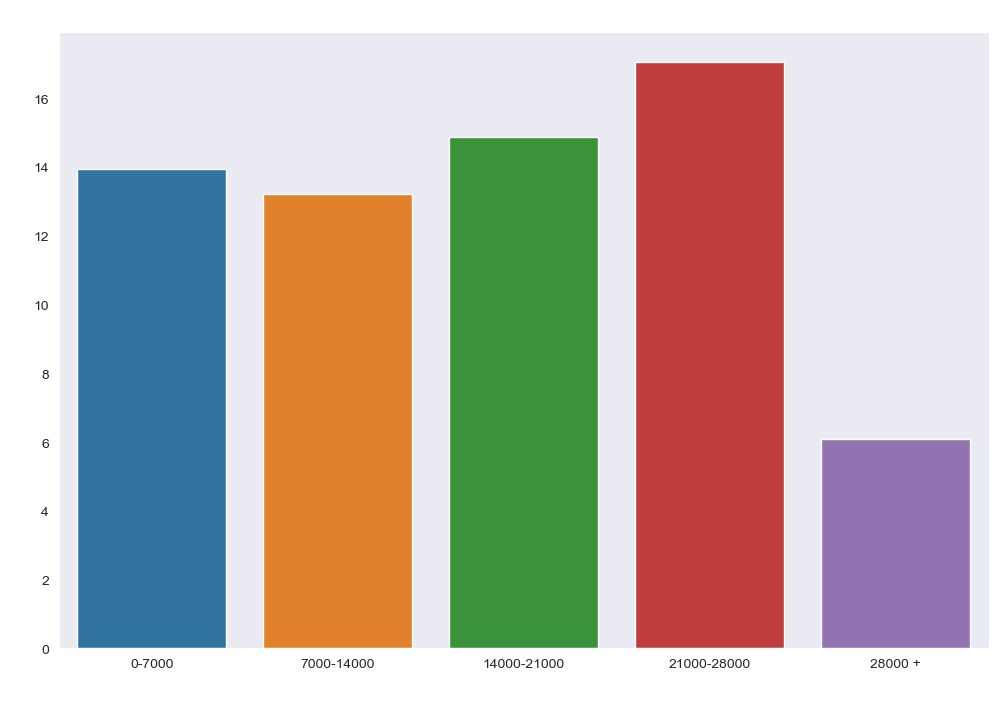

In [785]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1=sns.barplot(x='loan_amount', y='Chargedoff_Proportion %', data=loan_amnt_vs_loan)
ax1.set_xlabel('loan_amount',fontsize=14,color='w')
plt.title('loan amount vs Chargedoff Proportion',fontsize=15,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# There is not much difference in charged off proportion.
# This variable doesn't provide any insights for charged off.

In [786]:
# Bivariate Analysis on garde against Chargedoff_Proportion.

grade_vs_loan = data.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']  + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = (grade_vs_loan['Charged Off'])*100 / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# perticulary grade G and F  is more likely to charge off
# grade A is less likely to charge off

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G           68         132    200              34.000000
5               F          226         504    730              30.958904
4               E          566        1598   2164              26.155268
3               D          916        3332   4248              21.563089
2               C         1124        5739   6863              16.377677
1               B         1198        8933  10131              11.825091
0               A          506        8416   8922               5.671374

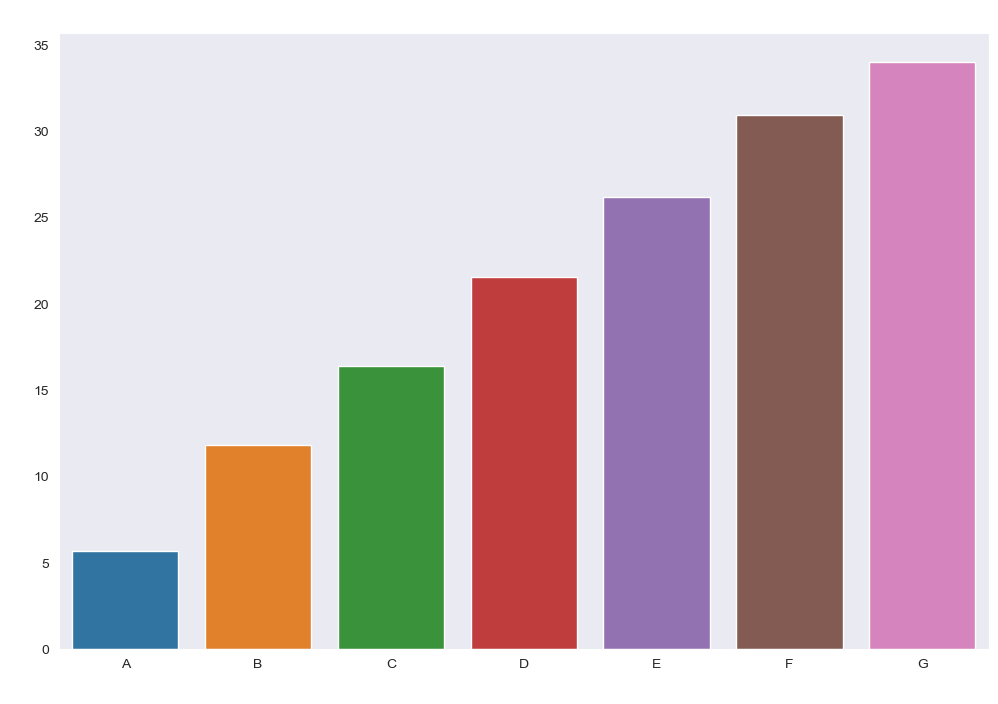

In [787]:
#  Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('grade vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('grade',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# perticulary grade G and F  is more likely to charge off
# grade A is less likely to charge off

In [788]:
# Bivariate Analysis on term of loan against Chargedoff_Proportion.

term_vs_loan = data.groupby(['term', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
term_vs_loan['Total'] = term_vs_loan['Charged Off']  + term_vs_loan['Fully Paid'] 
term_vs_loan['Chargedoff_Proportion'] = (term_vs_loan['Charged Off'])*100 / term_vs_loan['Total']
term_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Higher the term more charge off


loan_status        term  Charged Off  Fully Paid  Total  Chargedoff_Proportion
1             60 months         2047        6338   8385              24.412642
0             36 months         2557       22316  24873              10.280224

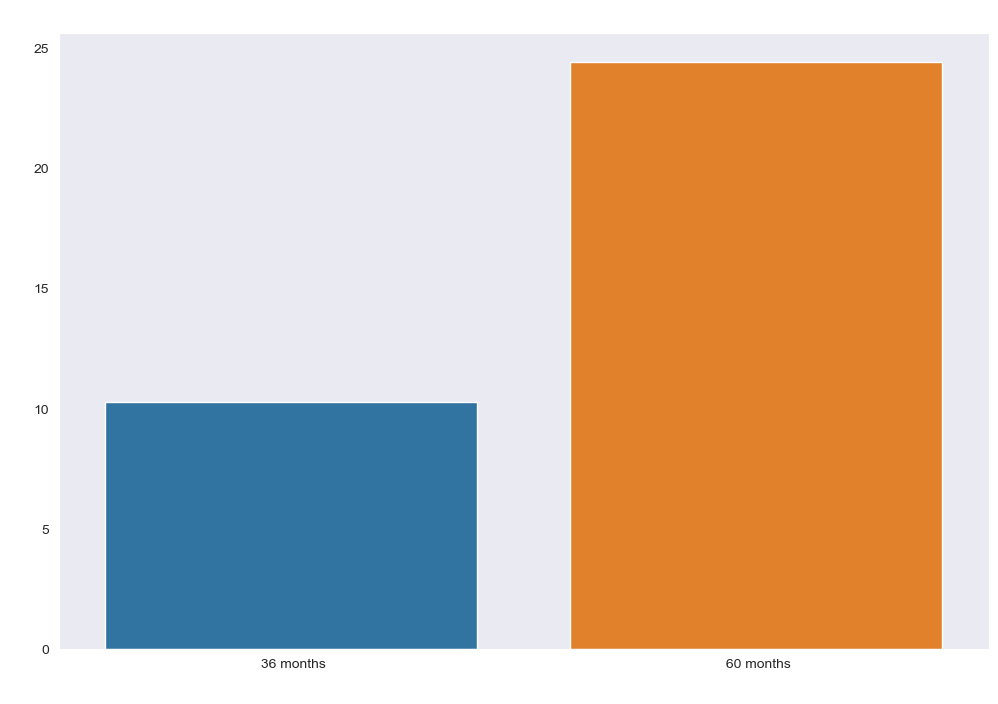

In [789]:
#  Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('term vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='term', y='Chargedoff_Proportion', data=term_vs_loan)
ax1.set_xlabel('term',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


# Observations:
# Higher the term more charge off

In [790]:
# Bivariate Analysis on sub grade against Chargedoff_Proportion.

sub_grade_vs_loan = data.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
sub_grade_vs_loan['Total'] = sub_grade_vs_loan['Charged Off']  + sub_grade_vs_loan['Fully Paid'] 
sub_grade_vs_loan['Chargedoff_Proportion'] = (sub_grade_vs_loan['Charged Off'])*100 / sub_grade_vs_loan['Total']
sub_grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# some sub grades crearly shows higher rate of charge off 

loan_status sub_grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
29                 F5           35          39     74              47.297297
31                 G2           20          31     51              39.215686
32                 G3           12          19     31              38.709677
34                 G5            7          12     19              36.842105
28                 F4           37          72    109              33.944954
30                 G1           19          40     59              32.203390
23                 E4          105         243    348              30.172414
27                 F3           38          89    127              29.921260
26                 F2           54         129    183              29.508197
24                 E5           78         198    276              28.260870
25                 F1           62         175    237              26.160338
21                 E2          131         373    504              25.992063
20                 E1          158         461    619              25.525040
19                 D5          174         514    688              25.290698
33                 G4           10          30     40              25.000000
18                 D4          181         578    759              23.847167
22                 E3           94         323    417              22.541966
17                 D3          207         727    934              22.162741
16                 D2          226         869   1095              20.639269
14                 C5          176         823    999              17.617618
12                 C3          231        1095   1326              17.420814
13                 C4          176         880   1056              16.666667
15                 D1          128         644    772              16.580311
11                 C2          271        1444   1715              15.801749
10                 C1          270        1497   1767              15.280136
9                  B5          318        1987   2305              13.796095
8                  B4          268        1849   2117              12.659424
7                  B3          289        2123   2412              11.981758
6                  B2          184        1554   1738              10.586881
5                  B1          139        1420   1559               8.915972
4                  A5          188        2232   2420               7.768595
3                  A4          155        2409   2564               6.045242
2                  A3           78        1524   1602               4.868914
1                  A2           62        1274   1336               4.640719
0                  A1           23         977   1000               2.300000

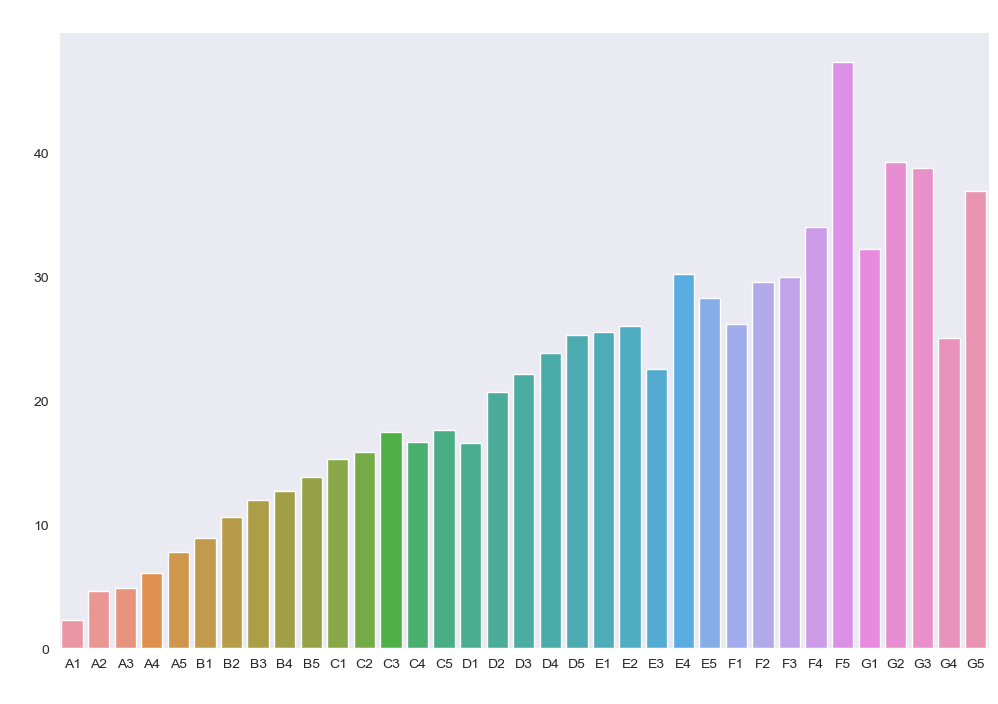

In [791]:
# Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('sub_grade vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=sub_grade_vs_loan)
ax1.set_xlabel('sub_grade',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()


# Observations:
# some sub grades crearly shows higher rate of charge off 

In [792]:
# Bivariate Analysis on verification against Chargedoff_Proportion.

verification_status_vs_loan = data.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verification_status_vs_loan['Total'] = purpose_vs_loan['Charged Off']  + purpose_vs_loan['Fully Paid'] 
verification_status_vs_loan['Chargedoff_Proportion'] = (purpose_vs_loan['Charged Off'])*100 / purpose_vs_loan['Total']
verification_status_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# data shows that even though non verified records are more but verified records are more charged off
# source verified records also have higher Chargedoff_Proportion

loan_status verification_status  Charged Off  Fully Paid  Total  \
2                      Verified         1589        8239   1602   
1               Source Verified         1277        7589   1336   
0                  Not Verified         1738       12826   1000   

loan_status  Chargedoff_Proportion  
2                         4.868914  
1                         4.640719  
0                         2.300000

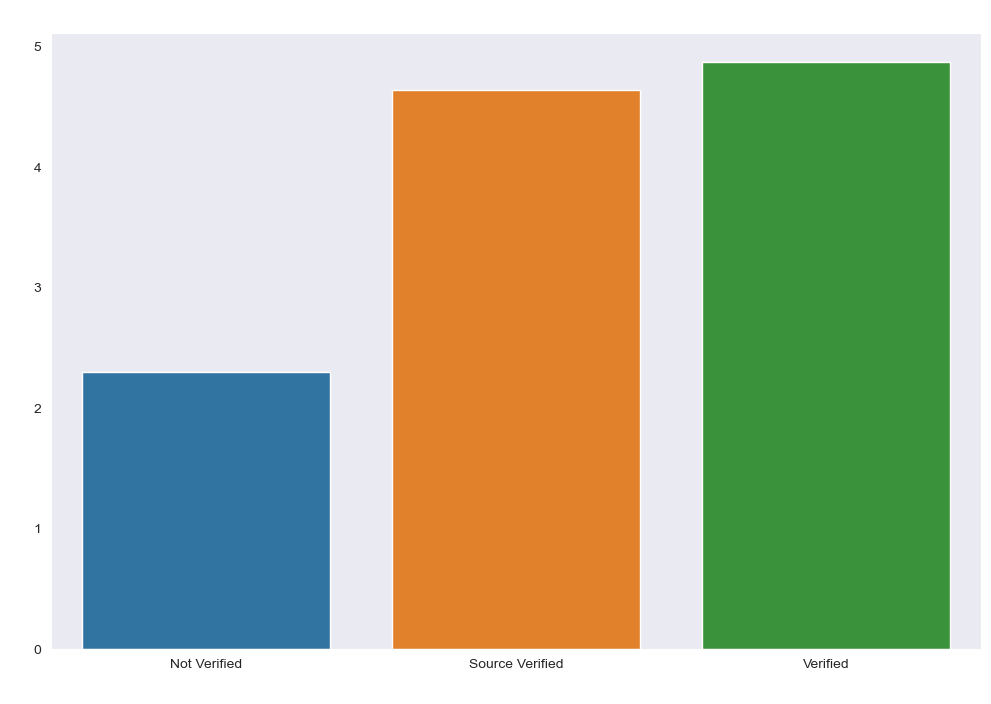

In [793]:
#  Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verification_status_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# data shows that even though non verified records are more but verified records are more charged off
# source verified records also have higher Chargedoff_Proportion

# Multivariate Analysis

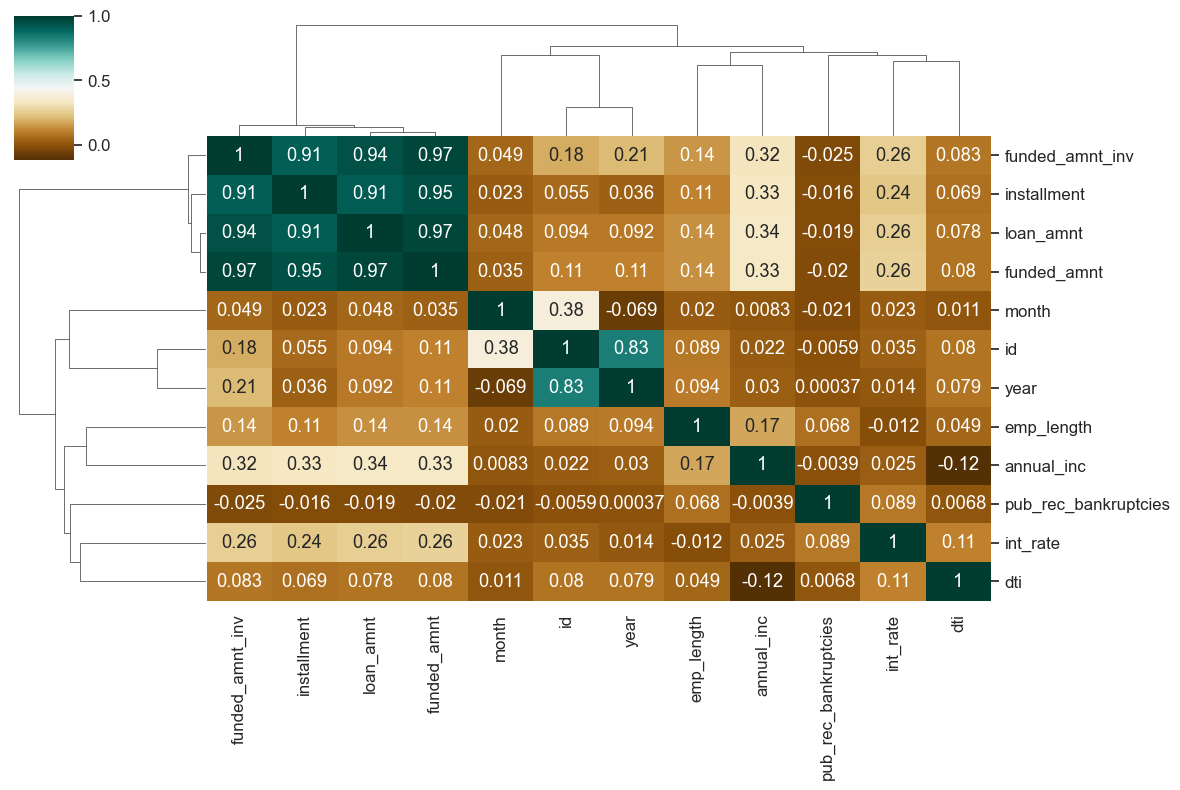

In [794]:
# multivariate analysis- Correlation Matrix
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = data.corr()
loan_correlation
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()
# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

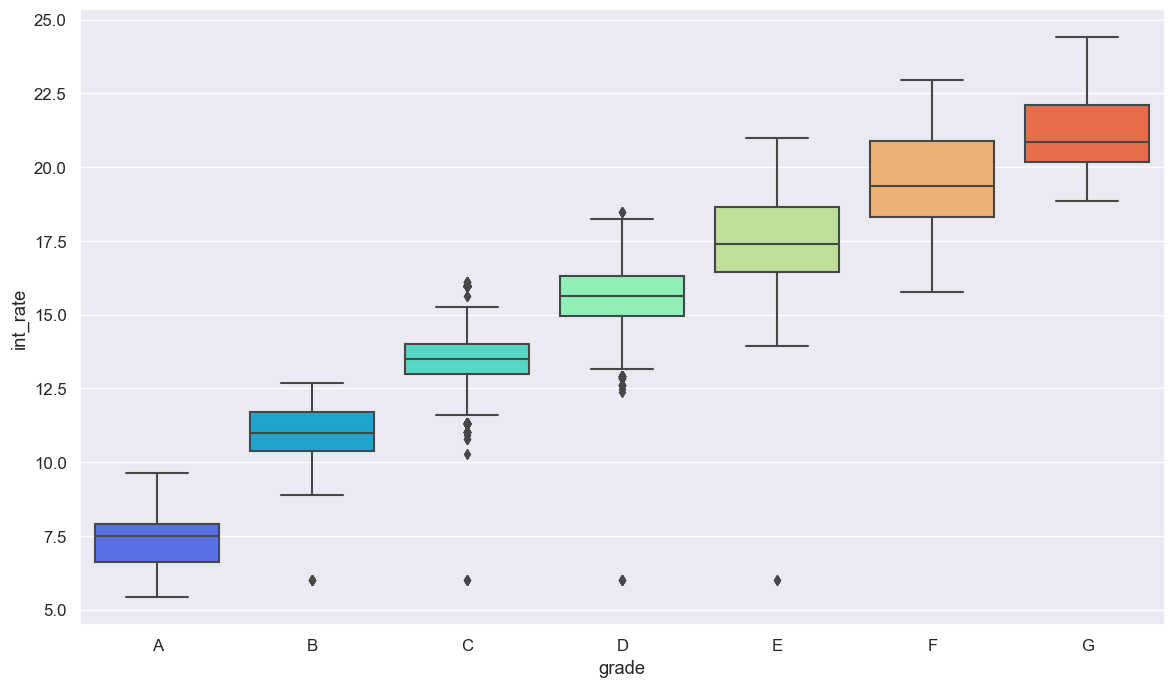

In [795]:
# Bivariate Analysis - Grade vs Interest Rate
# Box Plot

plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='grade', data =data,palette='rainbow',order = 'ABCDEFG')

plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.
# It is clear that intrest rate is increasing with grades moving from A to F.


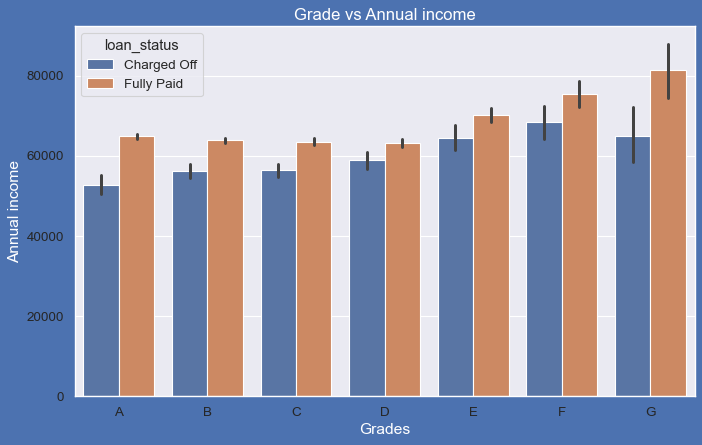

In [796]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=data, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

In [797]:
# plotting pair plot for some specific columns

loan_pair = data[['loan_amnt', 'annual_inc', 'year','int_rate','loan_status']].copy()
loan_pair.head()

loan_amnt  annual_inc  year  int_rate  loan_status
1       2500     30000.0  2011     15.27  Charged Off
3      10000     49200.0  2011     13.49   Fully Paid
5       5000     36000.0  2011      7.90   Fully Paid
6       7000     47004.0  2011     15.96   Fully Paid
7       3000     48000.0  2011     18.64   Fully Paid

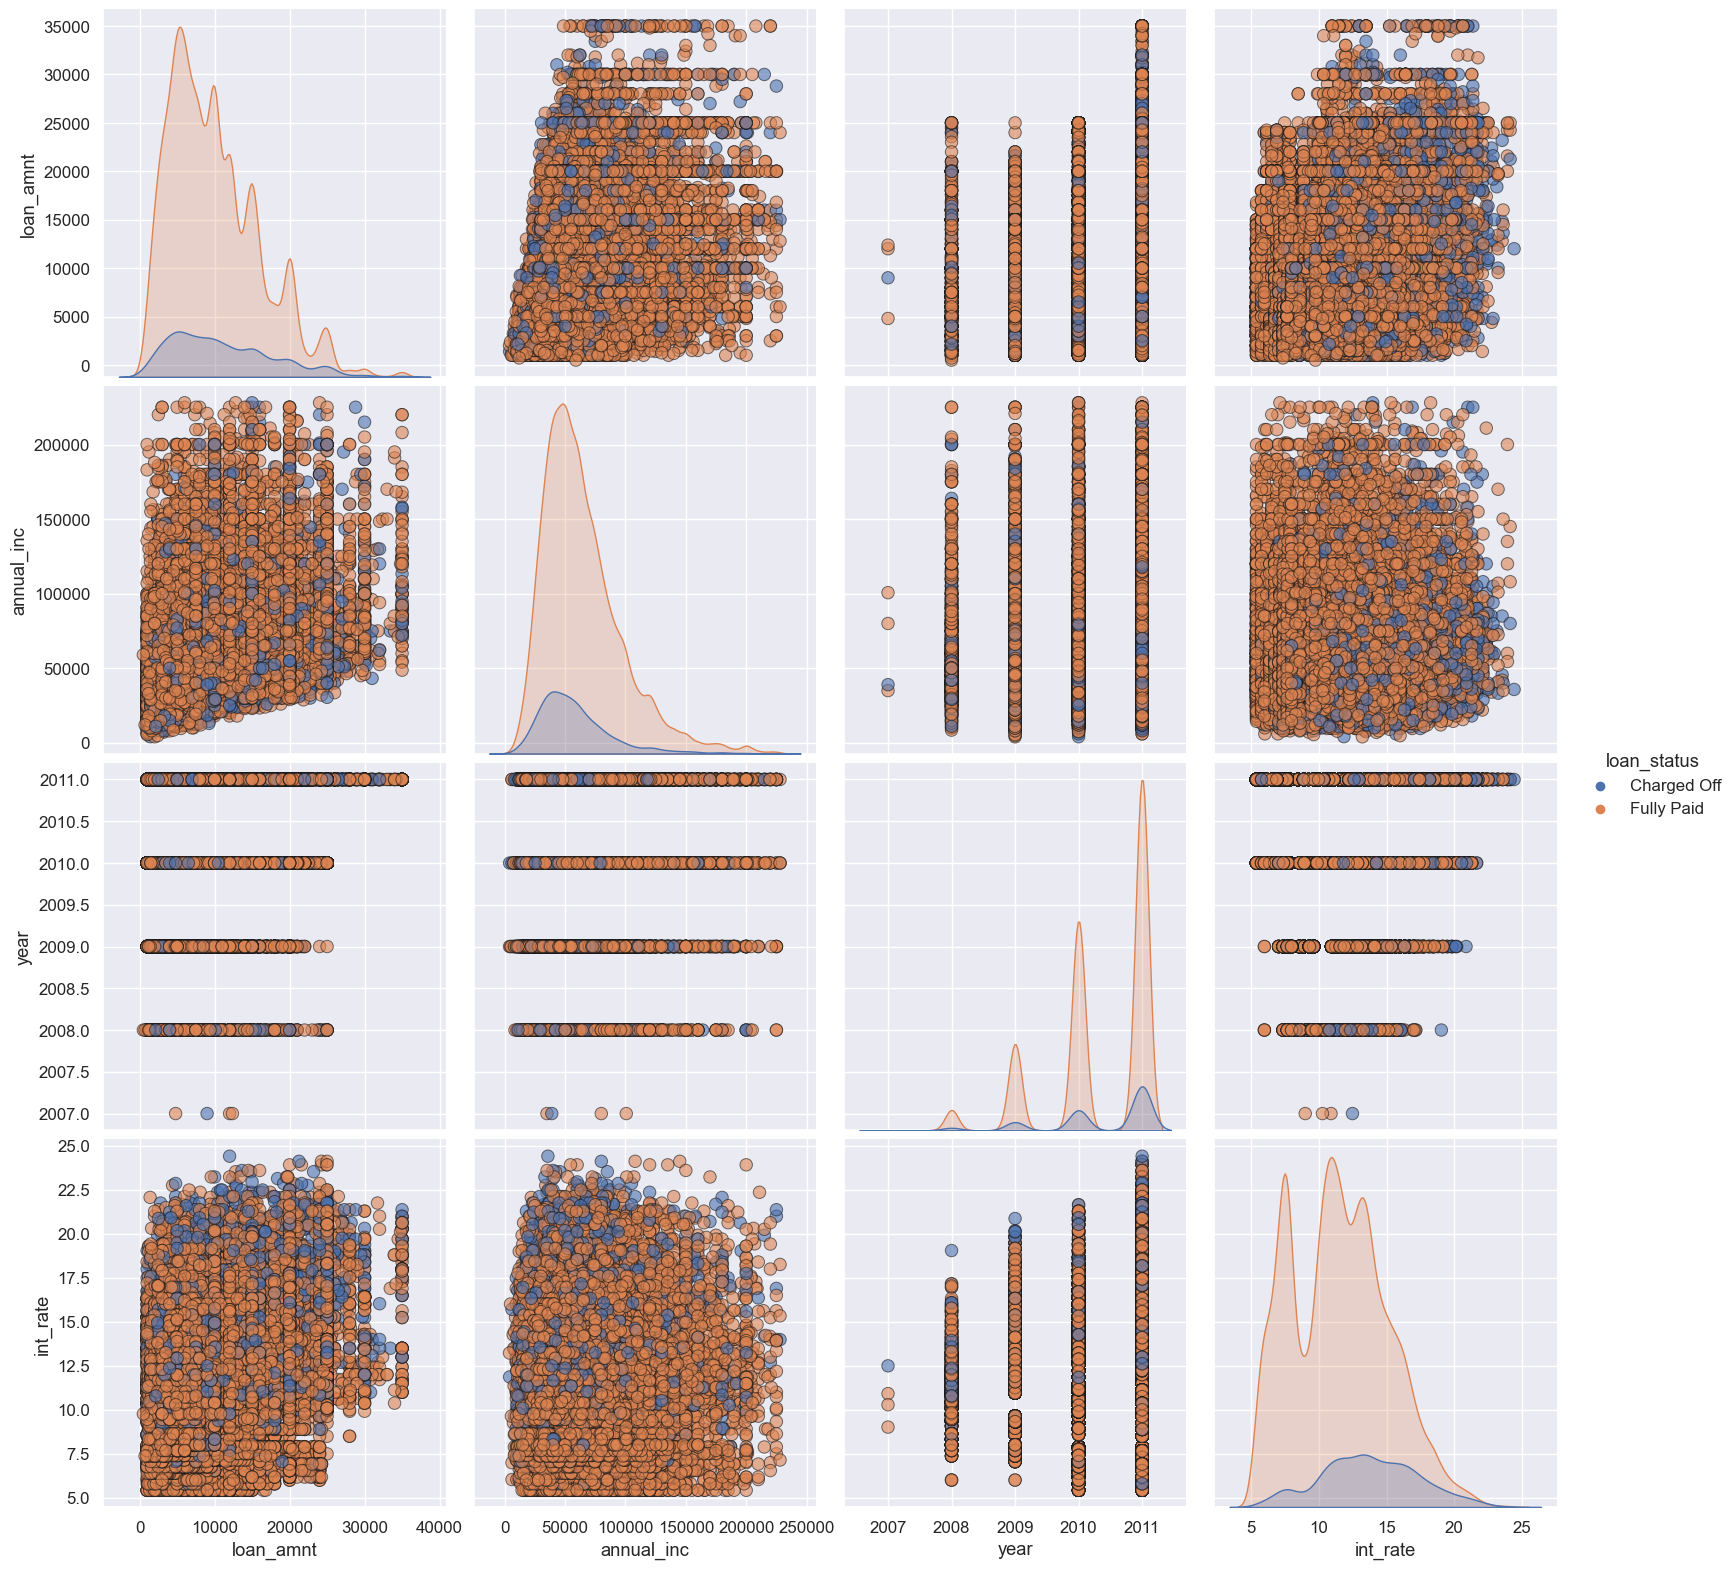

In [798]:
sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()


# Observations from entire data 

### Lending club should give loan more to borrower with 60 months tenure as the number of default is less with higher months.​

### Borrowers with high grades can be considered more preferably for issuing loan.​

### Lending club can focus more on Large business as small business prone to default more.​

### Lending club should stop giving loans to borrower with mortgage home ownership and asking for more than 12000.​